## Tree Type Prediction Project
In this project, firstly I applied ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering (using ***sqlite3*** library). 

Also,  commonly used algorithms for ***Multi-Class Classification*** are implemented. 

## Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines

#### *i. Import Libraries*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
# plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

#### *ii. Load Dataset*

In [2]:
tree = pd.read_csv("covtype.csv")

#### *iii. Explore Data*

In [3]:
tree.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6279                 1                 0   
1                                6225                 1                 0   
2                                6121                 1                 0   
3                                6211                 1                 0   
4                                6172                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            1            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            1   
1            0            0            0            0            1   
2            0        

In [4]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [5]:
tree.describe().T

count     mean      std      min  \
Elevation                          581012.000 2959.365  279.985 1859.000   
Aspect                             581012.000  155.657  111.914    0.000   
Slope                              581012.000   14.104    7.488    0.000   
Horizontal_Distance_To_Hydrology   581012.000  269.428  212.549    0.000   
Vertical_Distance_To_Hydrology     581012.000   46.419   58.295 -173.000   
Horizontal_Distance_To_Roadways    581012.000 2350.147 1559.255    0.000   
Hillshade_9am                      581012.000  212.146   26.770    0.000   
Hillshade_Noon                     581012.000  223.319   19.769    0.000   
Hillshade_3pm                      581012.000  142.528   38.275    0.000   
Horizontal_Distance_To_Fire_Points 581012.000 1980.291 1324.195    0.000   
Wilderness_Area1                   581012.000    0.449    0.497    0.000   
Wilderness_Area2                   581012.000    0.051    0.221    0.000   
Wilderness_Area3                   581012.000    0.436    0.496    0.000   
Wilderness_Area4                   581012.000    0.064    0.244    0.000   
Soil_Type1                         581012.000    0.005    0.072    0.000   
Soil_Type2                         581012.000    0.013    0.113    0.000   
Soil_Type3                         581012.000    0.008    0.091    0.000   
Soil_Type4                         581012.000    0.021    0.144    0.000   
Soil_Type5                         581012.000    0.003    0.052    0.000   
Soil_Type6                         581012.000    0.011    0.106    0.000   
Soil_Type7                         581012.000    0.000    0.013    0.000   
Soil_Type8                         581012.000    0.000    0.018    0.000   
Soil_Type9                         581012.000    0.002    0.044    0.000   
Soil_Type10                        581012.000    0.056    0.230    0.000   
Soil_Type11                        581012.000    0.021    0.145    0.000   
Soil_Type12                        581012.000    0.052    0.221    0.000   
Soil_Type13                        581012.000    0.030    0.171    0.000   
Soil_Type14                        581012.000    0.001    0.032    0.000   
Soil_Type15                        581012.000    0.000    0.002    0.000   
Soil_Type16                        581012.000    0.005    0.070    0.000   
Soil_Type17                        581012.000    0.006    0.077    0.000   
Soil_Type18                        581012.000    0.003    0.057    0.000   
Soil_Type19                        581012.000    0.007    0.083    0.000   
Soil_Type20                        581012.000    0.016    0.125    0.000   
Soil_Type21                        581012.000    0.001    0.038    0.000   
Soil_Type22                        581012.000    0.057    0.233    0.000   
Soil_Type23                        581012.000    0.099    0.299    0.000   
Soil_Type24                        581012.000    0.037    0.188    0.000   
Soil_Type25                        581012.000    0.001    0.029    0.000   
Soil_Type26                        581012.000    0.004    0.067    0.000   
Soil_Type27                        581012.000    0.002    0.043    0.000   
Soil_Type28                        581012.000    0.002    0.040    0.000   
Soil_Type29                        581012.000    0.198    0.399    0.000   
Soil_Type30                        581012.000    0.052    0.222    0.000   
Soil_Type31                        581012.000    0.044    0.205    0.000   
Soil_Type32                        581012.000    0.090    0.287    0.000   
Soil_Type33                        581012.000    0.078    0.268    0.000   
Soil_Type34                        581012.000    0.003    0.053    0.000   
Soil_Type35                        581012.000    0.003    0.057    0.000   
Soil_Type36                        581012.000    0.000    0.014    0.000   
Soil_Type37                        581012.000    0.001    0.023    0.000   
Soil_Type38                        581012.000    0.027    0.162    0.000   
Soil_Type39 

In [6]:
tree.apply(lambda x: x.nunique())

Elevation                             1978
Aspect                                 361
Slope                                   67
Horizontal_Distance_To_Hydrology       551
Vertical_Distance_To_Hydrology         700
Horizontal_Distance_To_Roadways       5785
Hillshade_9am                          207
Hillshade_Noon                         185
Hillshade_3pm                          255
Horizontal_Distance_To_Fire_Points    5827
Wilderness_Area1                         2
Wilderness_Area2                         2
Wilderness_Area3                         2
Wilderness_Area4                         2
Soil_Type1                               2
Soil_Type2                               2
Soil_Type3                               2
Soil_Type4                               2
Soil_Type5                               2
Soil_Type6                               2
Soil_Type7                               2
Soil_Type8                               2
Soil_Type9                               2
Soil_Type10

### Summary results :
- ``"Elevation"``, `"Slope"`, `"Horizontal_Distance_To_Hydrology"`, `"Vertical_Distance_To_Hydrology"`, `"Horizontal_Distance_To_Roadways"`, `"Horizontal_Distance_To_Fire_Points"` are continuous variables and their values vary.
- `"Aspect"` is also continuous and its values vary from 0 to 360. It has angular values.
- ``"Hillshade_3pm"``, ``"Hillshade_Noon"``, ``"Hillshade_3pm"`` are also continuos and their values vary from 0 to 255. This means that the values represent bitwise value. I concluded that the values are RGB color representation of the shadow at a particular time.
- ``Wilderness_Areas`` and `Soil_Types` are categorical (binary 1 or 0) data.

In [7]:
tree_type_dist = pd.DataFrame(tree.Cover_Type.value_counts())
tree_type_dist["ratio"] = tree.Cover_Type.value_counts(normalize = True)*100
tree_type_dist.columns = ["count", "ratio"]
tree_type_dist

count  ratio
2  283301 48.760
1  211840 36.461
3   35754  6.154
7   20510  3.530
6   17367  2.989
5    9493  1.634
4    2747  0.473

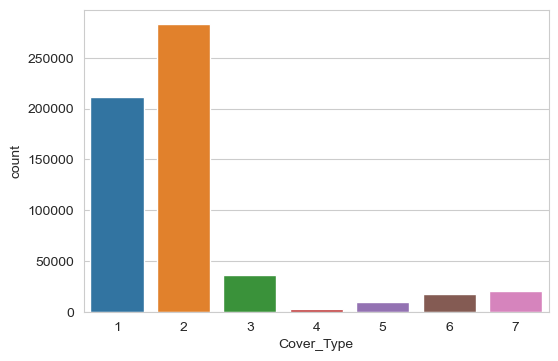

In [8]:
sns.countplot(tree.Cover_Type);

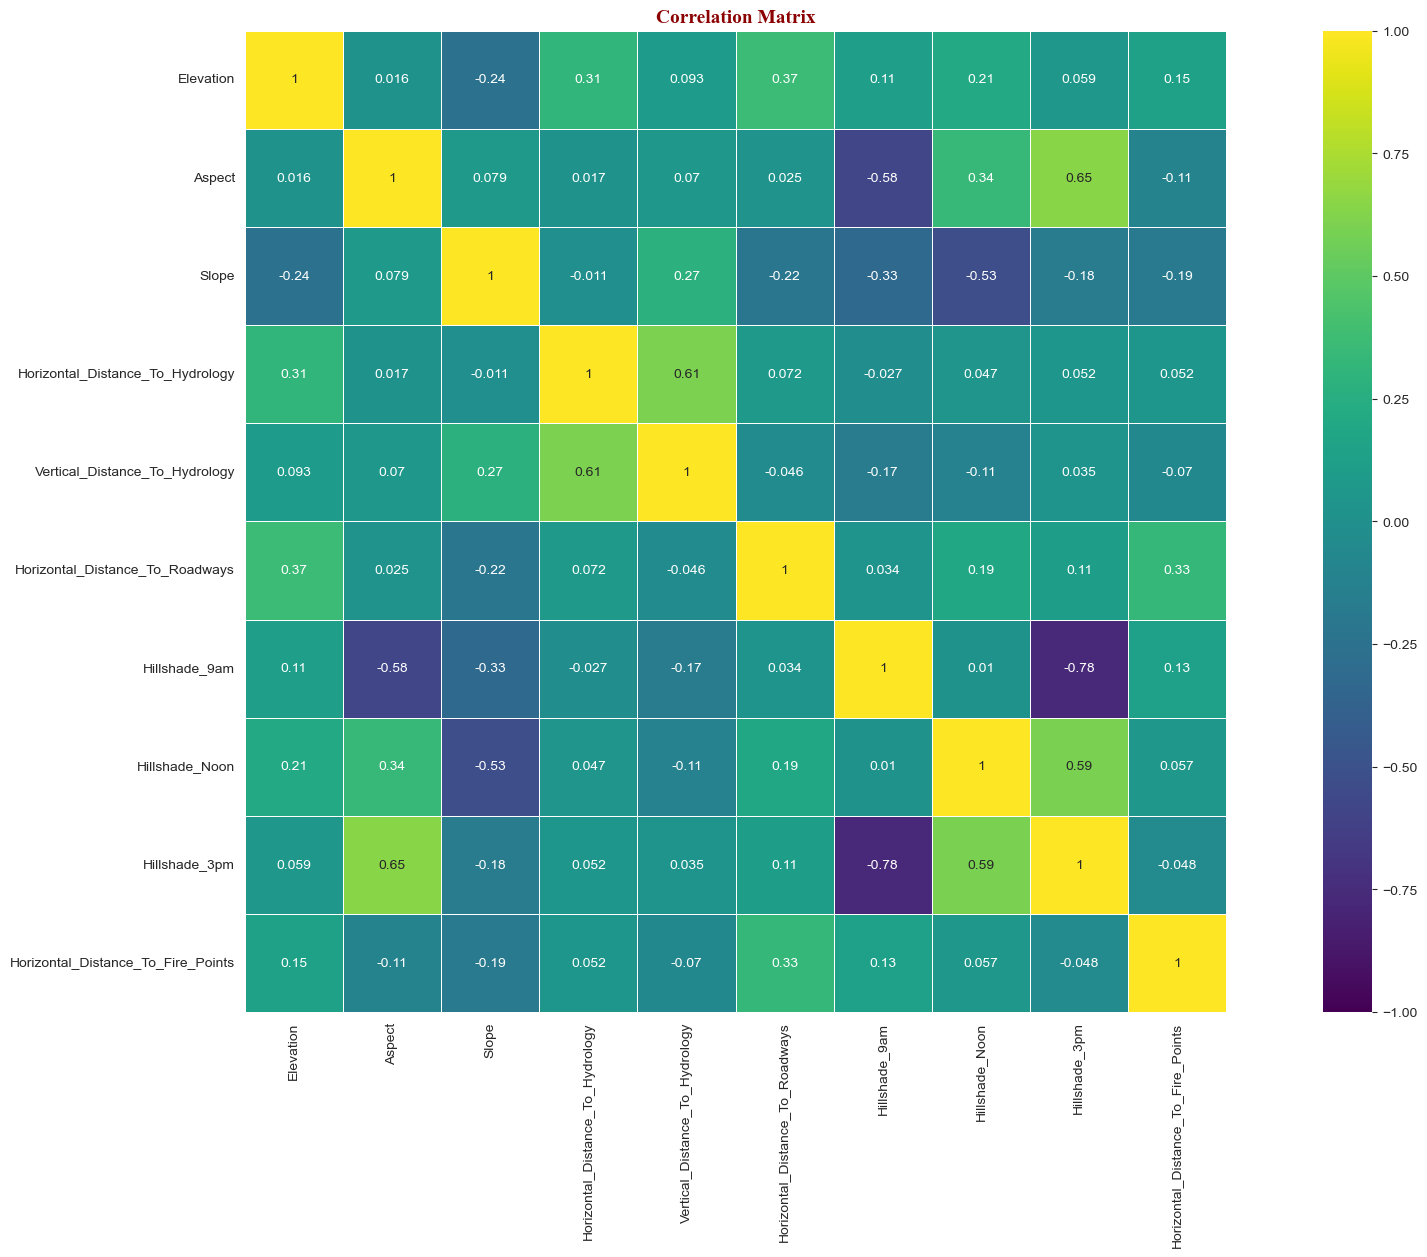

In [9]:
corr_matrix = tree[tree.columns[:10]].corr()

font_title = {'family': 'times new roman',
              'color': 'darkred',
              'weight': 'bold',
              'size': 14}

plt.figure(figsize=(25, 13))
sns.heatmap(corr_matrix, square=True, annot=True, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix", fontdict=font_title)
plt.show()

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [10]:
tree.isnull().sum().any()

False

#### *ii. Outlier Detection*

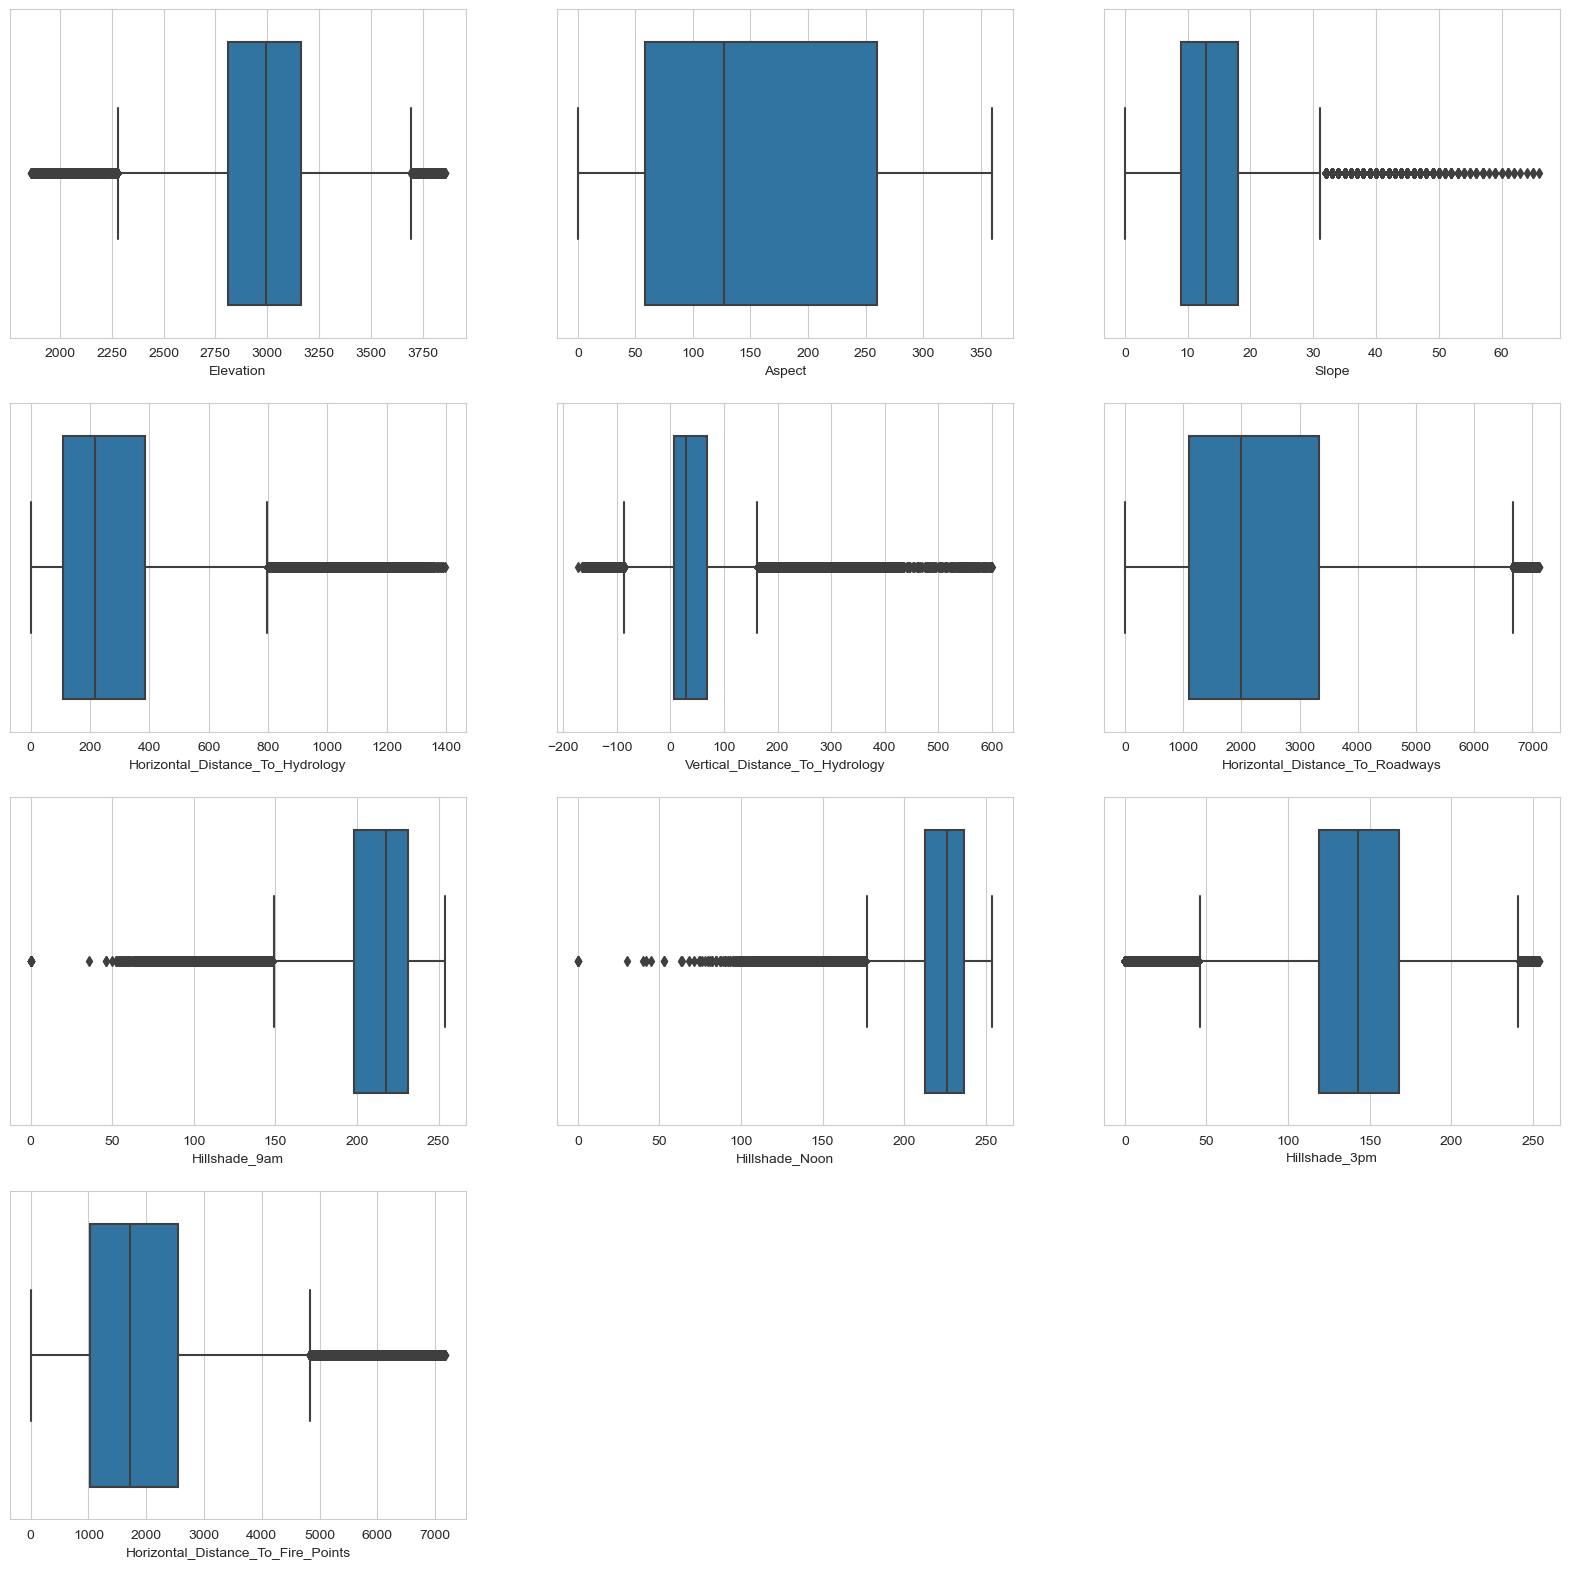

In [11]:
index = 0
plt.figure(figsize=(20,20))
for feature in tree.columns[:10]:
    index += 1
    plt.subplot(4,3,index)
    sns.boxplot(x=feature, data=tree, whis=1.5)

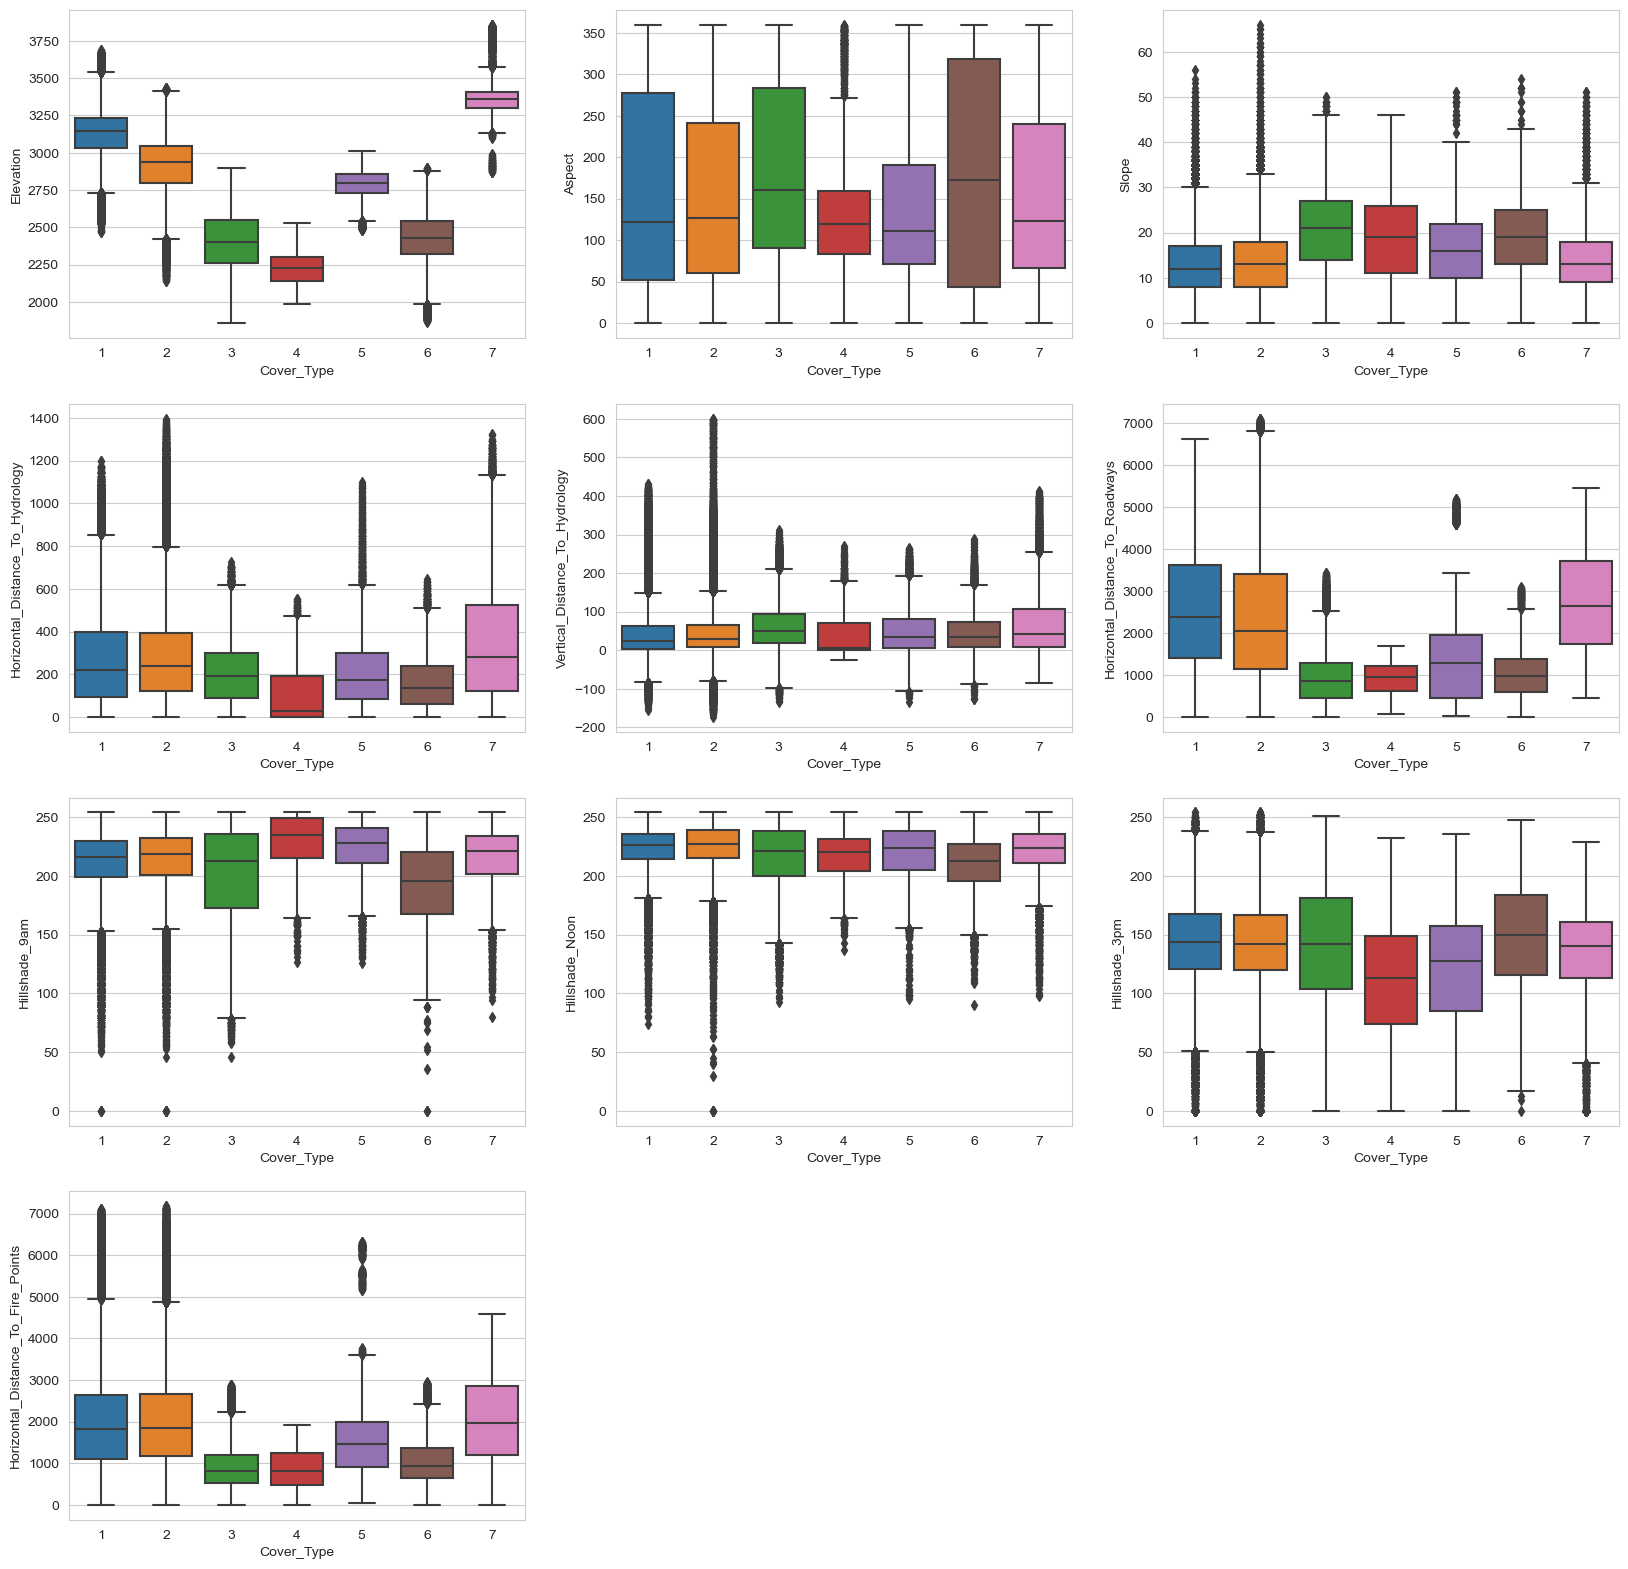

In [12]:
index = 0
plt.figure(figsize=(20,20))
for feature in tree.columns[:10]:
    index += 1
    plt.subplot(4,3,index)
    sns.boxplot(y = feature, x = "Cover_Type", data = tree, whis=1.5)

### Deal with Outliers

#### *i. Visualize Zscore Tresholds (how many times IQR) by Continuous Variables*

In [13]:
from scipy.stats import zscore
from scipy import stats
from numpy import percentile

In [14]:
'''This function detects the best z-score for outlier detection in the specified column.'''

def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.05, print_list = False):
    z_scores = stats.zscore(df[col].dropna())
    threshold_list = []
    
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
    
    df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
    df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    df_outlier['pct'] = df_outlier['pct'].apply(lambda x : x-100 if x == 100 else x)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    IQR_coef = round((best_treshold - 0.675) / 1.35, 2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    num_outlier = df_outlier.iloc[df_outlier.pct.argmax(), 1]
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), colors="r", ls = ":")
    plt.annotate("Zscore : {}\nIQR_coef : {}\nValue : {}\nNum_outlier : {}\nPercentile : {}".format(best_treshold,
                                                                          IQR_coef,
                                                                          outlier_limit,
                                                                          num_outlier,     
                                                                          (np.round(percentile_threshold, 3), 
                                                                           np.round(100-percentile_threshold, 3))),
                                                                          (best_treshold, df_outlier.outlier_count.max()/2))
    plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, IQR_coef, outlier_limit, num_outlier, percentile_threshold)

In [15]:
'''This function plots histogram, boxplot and z-score/outlier graphs for the specified column.'''

def outlier_inspect(df, col, min_z = 1, max_z = 5, step = 0.05, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z = min_z, max_z = max_z, step = step)
    plt.show()

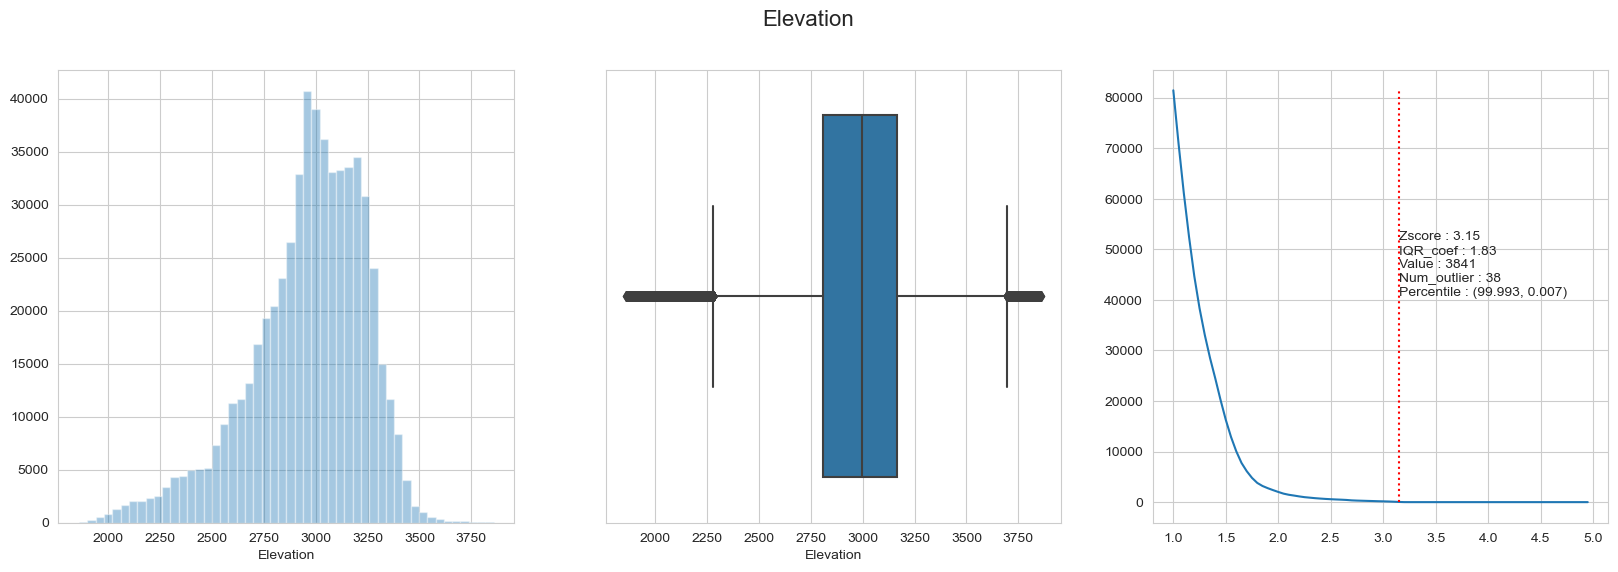

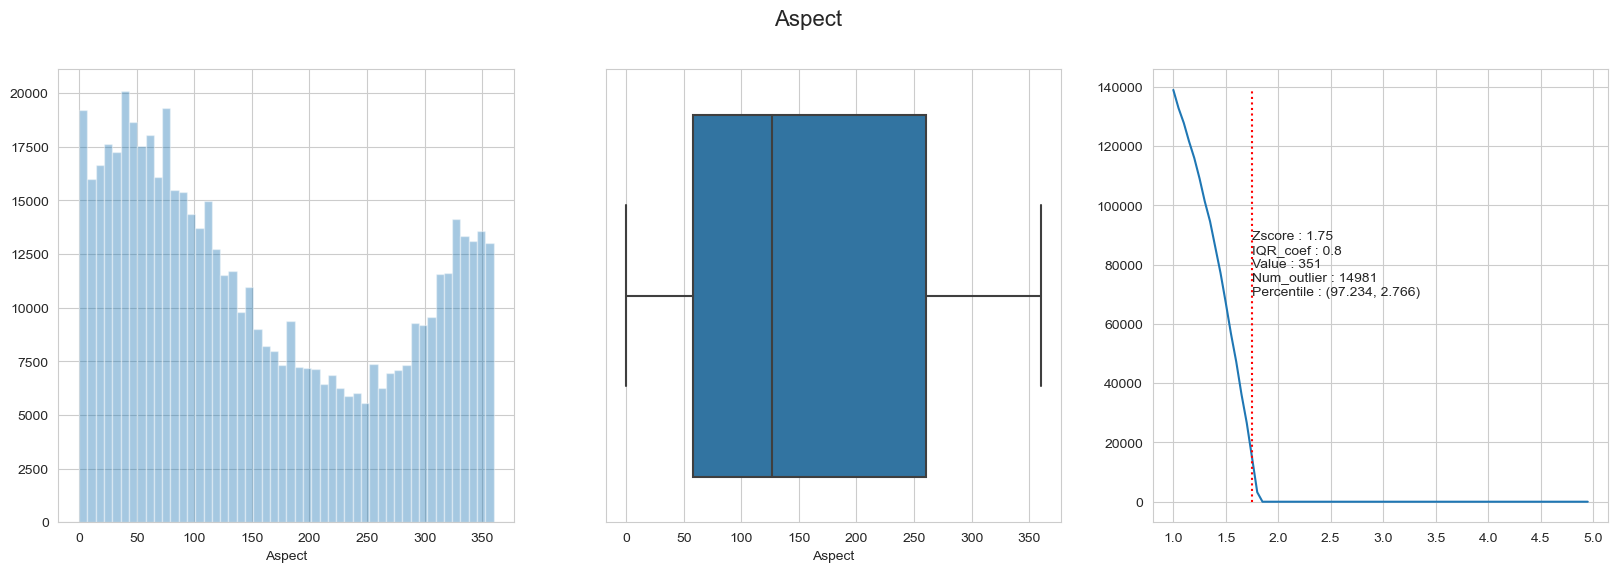

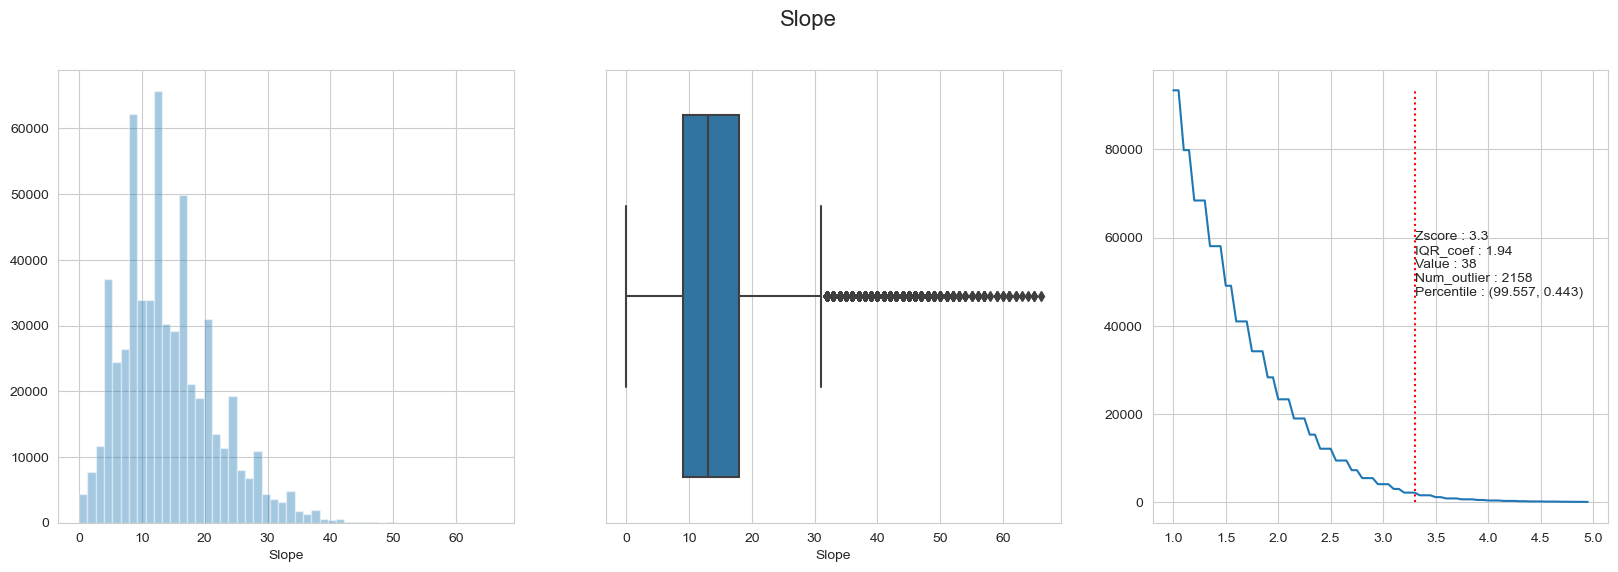

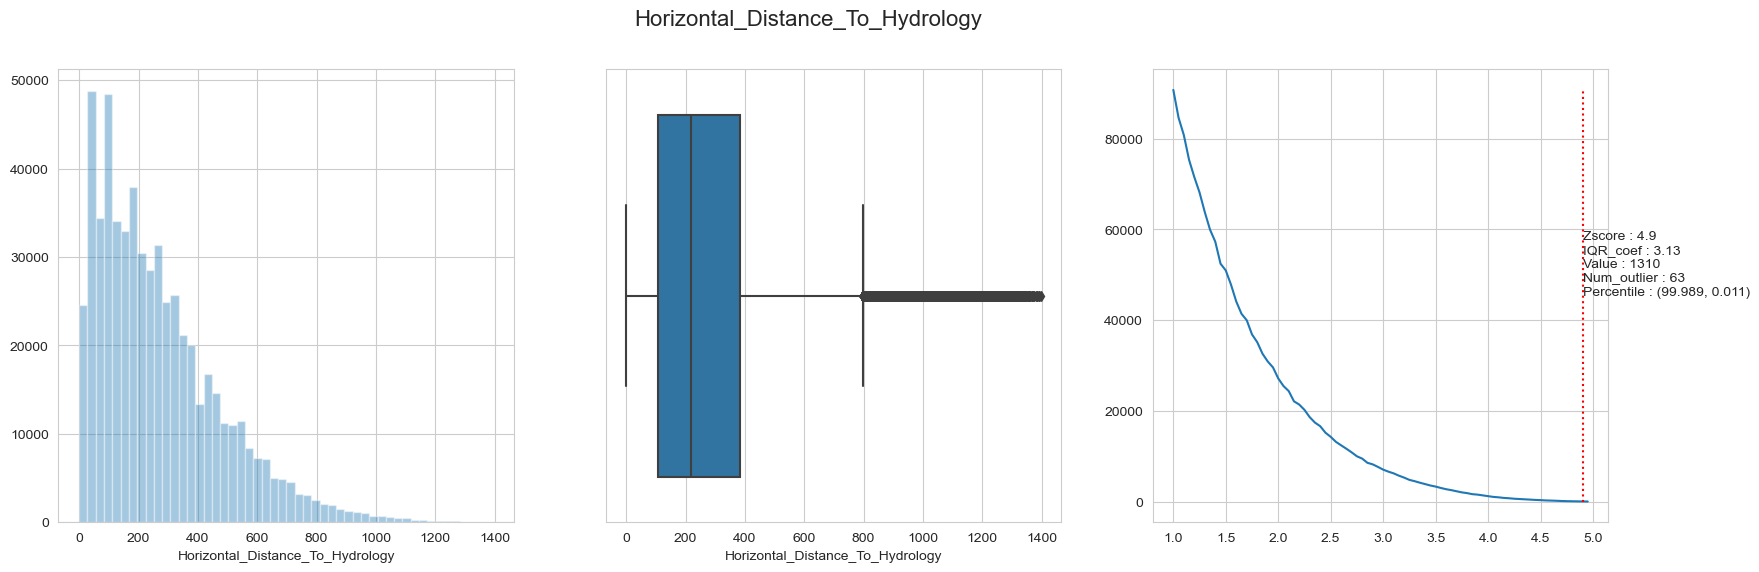

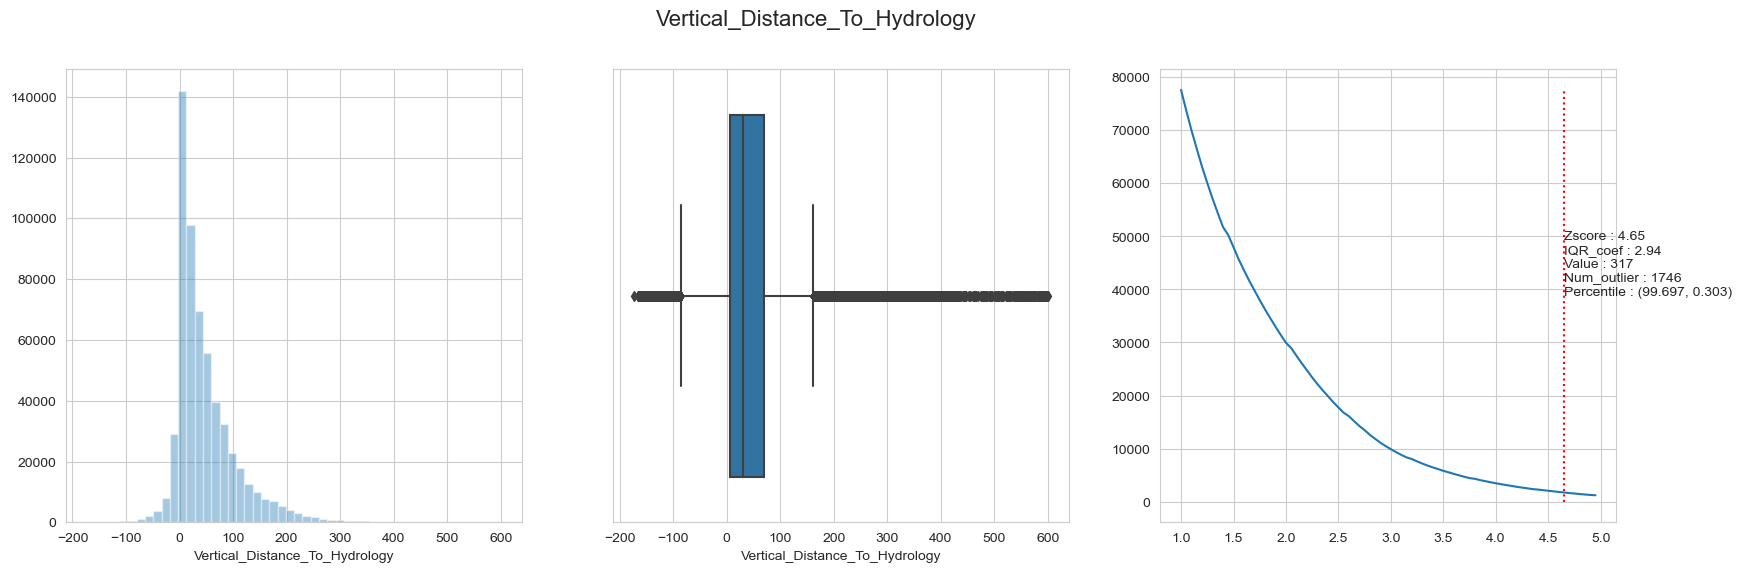

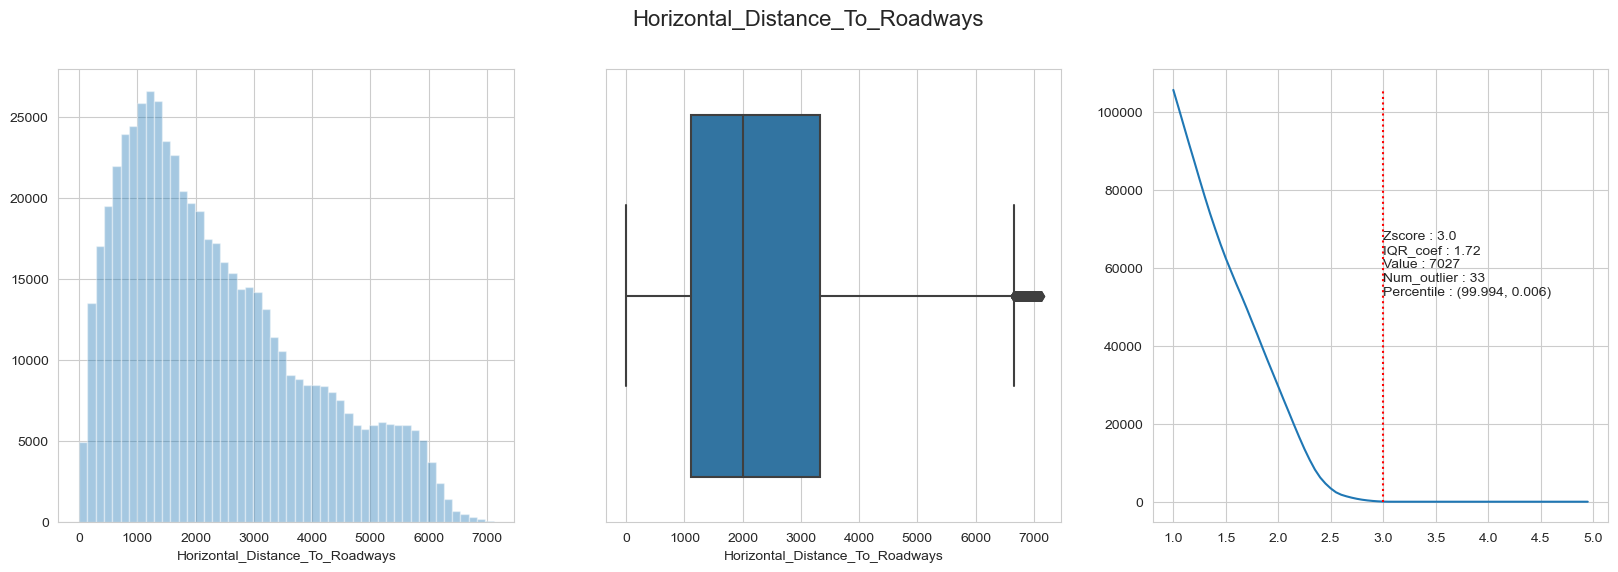

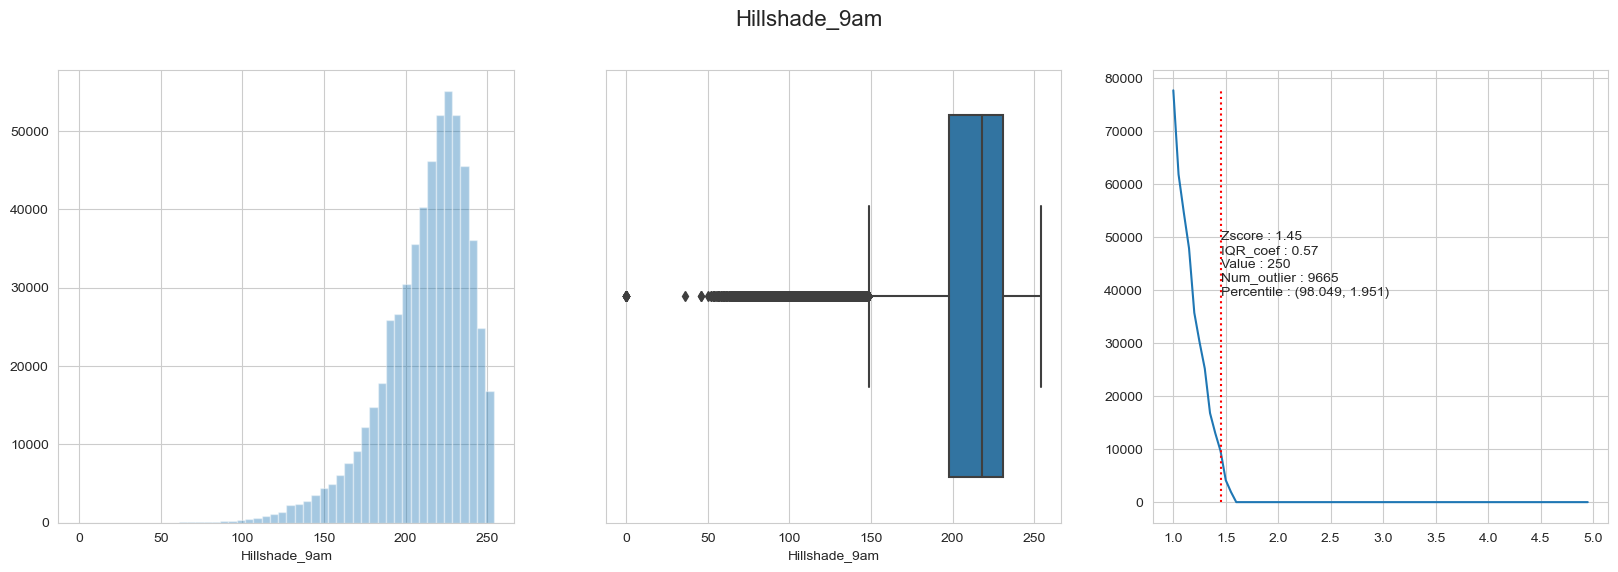

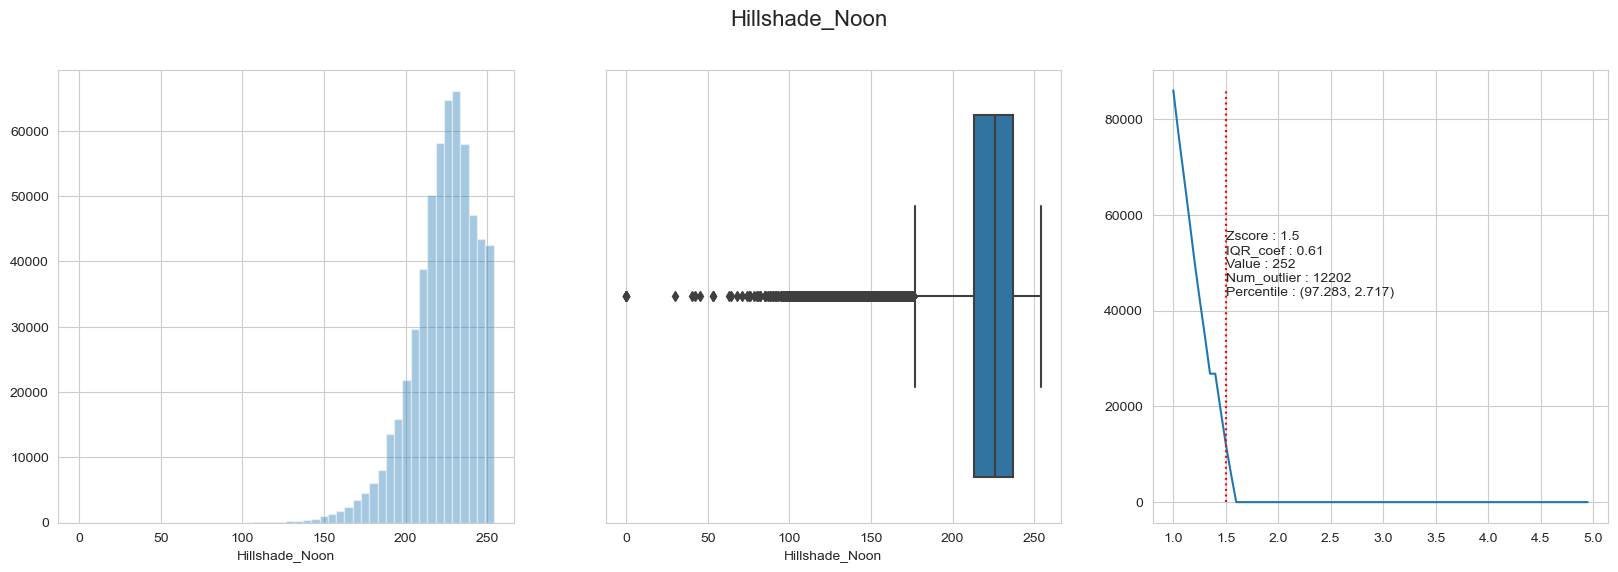

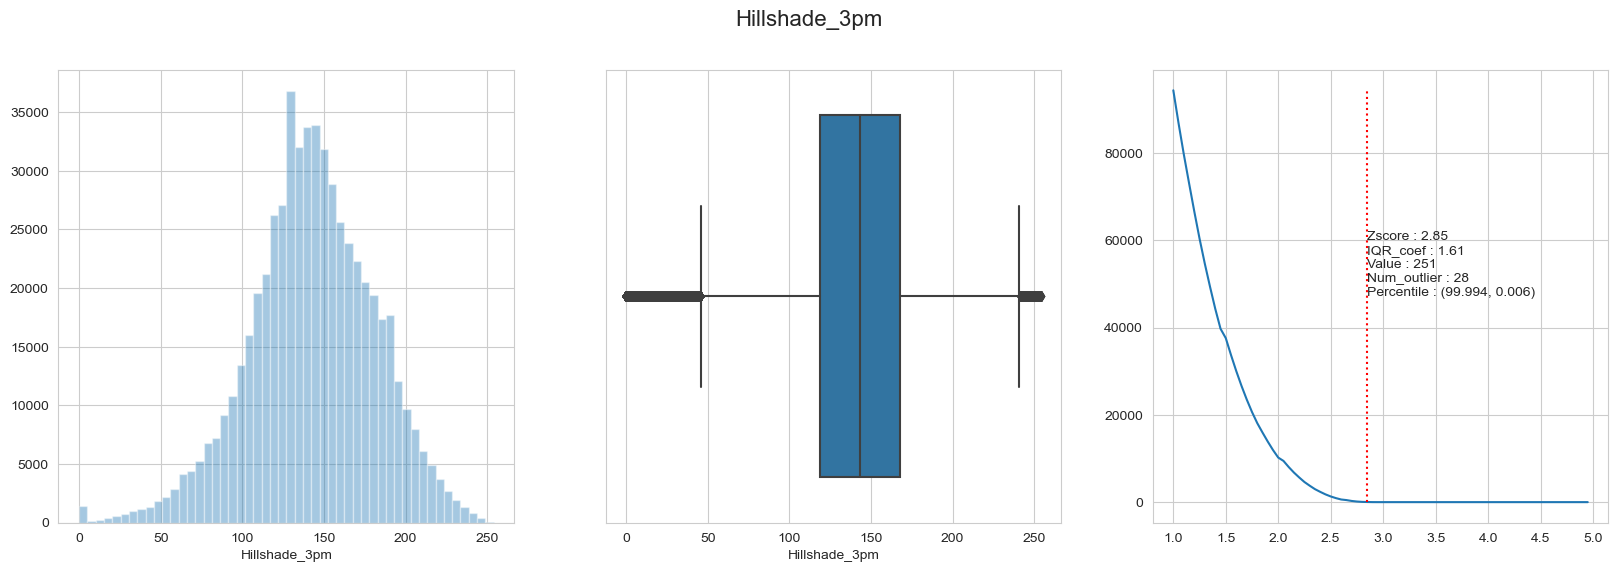

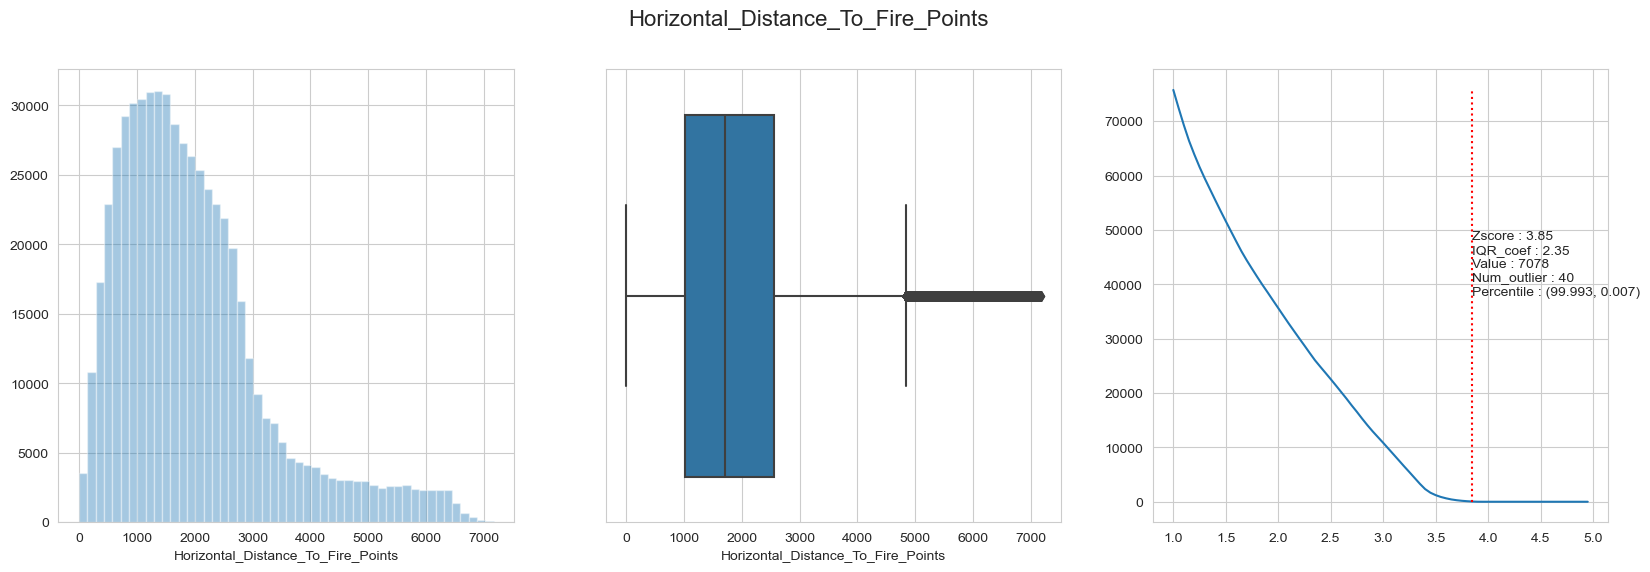

In [16]:
for col in tree.columns[:10]:
    outlier_inspect(tree, col)

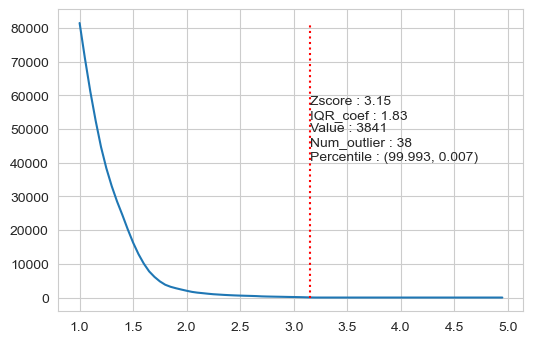

(<module 'matplotlib.pyplot' from 'C:\\Users\\erdem\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>,
     threshold  outlier_count    pct
 0       1.000          81456 12.952
 1       1.050          70906 13.783
 2       1.100          61133 14.189
 3       1.150          52459 14.804
 4       1.200          44693 14.188
 5       1.250          38352 13.770
 6       1.300          33071 13.810
 7       1.350          28504 14.166
 8       1.400          24466 17.310
 9       1.450          20231 19.465
 10      1.500          16293 20.862
 11      1.550          12894 22.002
 12      1.600          10057 22.899
 13      1.650           7754 21.150
 14      1.700           6114 21.541
 15      1.750           4797 20.742
 16      1.800           3802 16.018
 17      1.850           3193 13.530
 18      1.900           2761 13.836
 19      1.950           2379 15.259
 20      2.000           2016 16.518
 21      2.050           1683 13.310
 22      2.100           1459 10.829
 23

In [17]:
outlier_zscore(tree, "Elevation")

## Evaluation

1. There is no missing value in this data set.
2. When each feature is examined, although it is seen that there are outliers in the boxplots, it is evaluated that this dataset does not actually have an outlier.
3. However, since it was considered that the data with a z-score value above 4.73 (IQR_coef = 3) according to the tree type would adversely affect the model, it was decided to assign the Nan-Value to these data first and then drop them.

In [18]:
IQR_coef = 3
z_score = round(0.675 + IQR_coef*1.35, 2)
z_score

4.73

In [19]:
z_score = 3
iqr_coef = round((z_score - 0.675) / 1.35, 2)
iqr_coef

1.72

#### *ii. Drop Outliers*

In [20]:
df = tree.copy()

In [21]:
"""This function gives max/min threshold, number of data, number of outlier and plots its boxplot,
according to the tree type and the entered z-score value for the relevant column."""

def num_outliers(df, col, whis = 1.5):
    q1 = df.groupby("Cover_Type")[col].quantile(0.25)
    q3 = df.groupby("Cover_Type")[col].quantile(0.75)
    iqr = q3 - q1
    print("Column_name :", col)
    print("whis :", whis)
    print("-------------------------------------------")
    for i in np.sort(df.Cover_Type.unique()):
        min_threshold = q1.loc[i] - whis*iqr.loc[i]
        max_threshold = q3.loc[i] + whis*iqr.loc[i]
        print("min_threshold:", min_threshold, "\nmax_threshold:", max_threshold)
        num_outliers = len(df[df["Cover_Type"]==i][col][(df[col]<min_threshold) | (df[col]>max_threshold)])
        print(f"Num_of_values for {i} :", len(df[df["Cover_Type"]==i]))
        print(f"Num_of_outliers for {i} :", num_outliers)
        print("-------------------------------------------")
    return sns.boxplot(y = df[col], x = df["Cover_Type"], whis=whis)

"""This function assigns the NaN-value first and then the mean value instead of the outlier values,
according to the tree type and the entered z_score value and plots the boxplot for the relevant column. """

def remove_outliers(df, col, whis=1.5):
    q1 = df.groupby("Cover_Type")[col].quantile(0.25)
    q3 = df.groupby("Cover_Type")[col].quantile(0.75)
    iqr = q3 - q1
    for i in np.sort(df.Cover_Type.unique()):
        min_threshold = q1.loc[i] - whis*iqr.loc[i]
        max_threshold = q3.loc[i] + whis*iqr.loc[i]
        df.loc[((df["Cover_Type"]==i) & ((df[col]<min_threshold) | (df[col]>max_threshold))), col] = np.nan
        df[col] = df[col].fillna(df.groupby("Cover_Type")[col].transform("mean"))
    return sns.boxplot(y = df[col], x = df["Cover_Type"], whis=whis)

In [22]:
"""This function assigns the NaN-value first and then drop related rows, according to the tree type and the entered
whis value and plots the boxplot for the relevant column. """

def remove_outliers(df, col, whis=1.5):
    q1 = df.groupby("Cover_Type")[col].quantile(0.25)
    q3 = df.groupby("Cover_Type")[col].quantile(0.75)
    iqr = q3 - q1
    for i in np.sort(df.Cover_Type.unique()):
        min_threshold = q1.loc[i] - whis*iqr.loc[i]
        max_threshold = q3.loc[i] + whis*iqr.loc[i]
        df.loc[((df["Cover_Type"]==i) & ((df[col]<min_threshold) | (df[col]>max_threshold))), col] = np.nan
    return sns.boxplot(y = df[col], x = df["Cover_Type"], whis=whis)

Elevation

Column_name : Elevation
whis : 3
-------------------------------------------
min_threshold: 2427.0 
max_threshold: 3841.0
Num_of_values for 1 : 211840
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: 2050.0 
max_threshold: 3786.0
Num_of_values for 2 : 283301
Num_of_outliers for 2 : 0
-------------------------------------------
min_threshold: 1394.0 
max_threshold: 3415.25
Num_of_values for 3 : 35754
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: 1656.0 
max_threshold: 2790.0
Num_of_values for 4 : 2747
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: 2357.0 
max_threshold: 3232.0
Num_of_values for 5 : 9493
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: 1648.0 
max_threshold: 3216.0
Num_of_values for 6 : 17367
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: 2970.0 
max_threshold: 3738.25
Num_of_values for 

<AxesSubplot:xlabel='Cover_Type', ylabel='Elevation'>

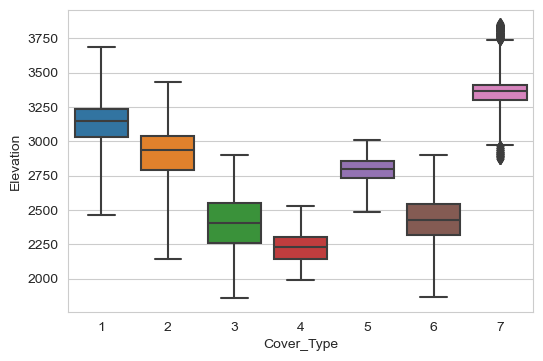

In [23]:
num_outliers(df, "Elevation", whis=3)

<AxesSubplot:xlabel='Cover_Type', ylabel='Elevation'>

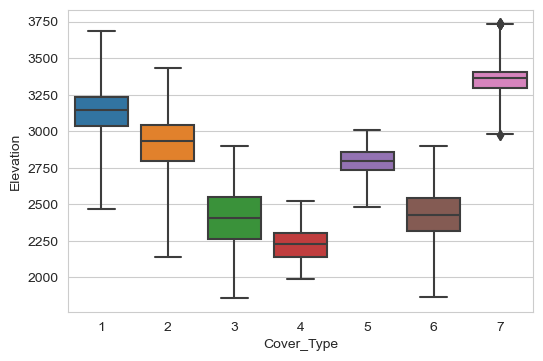

In [24]:
remove_outliers(df, "Elevation", whis=3)

Aspect

Column_name : Aspect
whis : 3
-------------------------------------------
min_threshold: -626.0 
max_threshold: 956.0
Num_of_values for 1 : 211840
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: -483.0 
max_threshold: 784.0
Num_of_values for 2 : 283301
Num_of_outliers for 2 : 0
-------------------------------------------
min_threshold: -492.0 
max_threshold: 866.0
Num_of_values for 3 : 35754
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -143.0 
max_threshold: 385.5
Num_of_values for 4 : 2747
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -289.0 
max_threshold: 551.0
Num_of_values for 5 : 9493
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: -785.0 
max_threshold: 1147.0
Num_of_values for 6 : 17367
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: -456.0 
max_threshold: 762.0
Num_of_values for 7 : 20510
N

<AxesSubplot:xlabel='Cover_Type', ylabel='Aspect'>

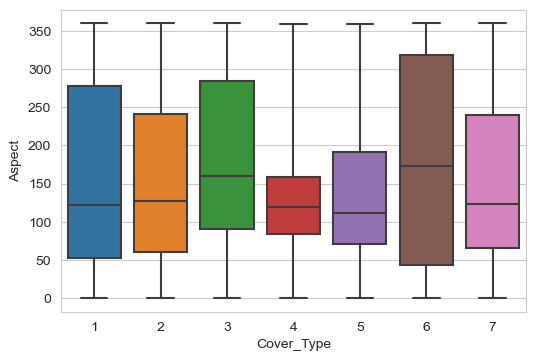

In [25]:
num_outliers(df, "Aspect", whis=3)

In [26]:
#remove_outliers(df, "Aspect", whis=3)

Slope

Column_name : Slope
whis : 3
-------------------------------------------
min_threshold: -19.0 
max_threshold: 44.0
Num_of_values for 1 : 211840
Num_of_outliers for 1 : 96
-------------------------------------------
min_threshold: -22.0 
max_threshold: 48.0
Num_of_values for 2 : 283301
Num_of_outliers for 2 : 63
-------------------------------------------
min_threshold: -25.0 
max_threshold: 66.0
Num_of_values for 3 : 35754
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -34.0 
max_threshold: 71.0
Num_of_values for 4 : 2747
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -26.0 
max_threshold: 58.0
Num_of_values for 5 : 9493
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: -23.0 
max_threshold: 61.0
Num_of_values for 6 : 17367
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: -18.0 
max_threshold: 45.0
Num_of_values for 7 : 20510
Num_of_outliers

<AxesSubplot:xlabel='Cover_Type', ylabel='Slope'>

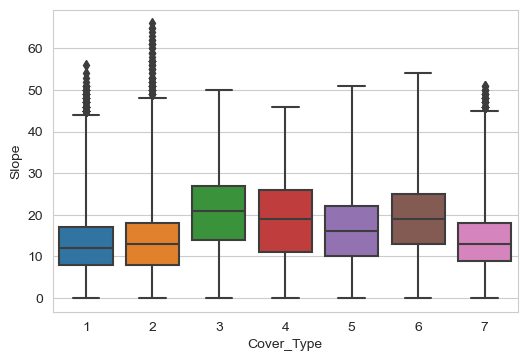

In [27]:
num_outliers(df, "Slope", whis=3)

<AxesSubplot:xlabel='Cover_Type', ylabel='Slope'>

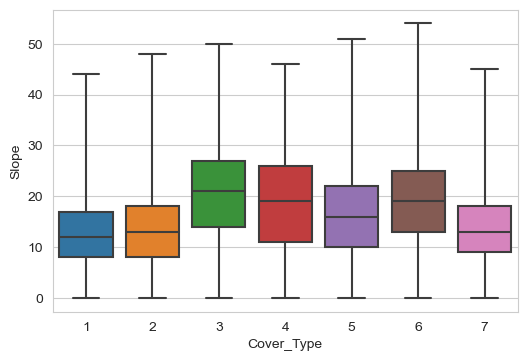

In [28]:
remove_outliers(df, "Slope", whis=3)

Horizontal_Distance_To_Hydrology

Column_name : Horizontal_Distance_To_Hydrology
whis : 3
-------------------------------------------
min_threshold: -820.0 
max_threshold: 1315.0
Num_of_values for 1 : 211840
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: -693.0 
max_threshold: 1204.0
Num_of_values for 2 : 283301
Num_of_outliers for 2 : 377
-------------------------------------------
min_threshold: -543.0 
max_threshold: 934.0
Num_of_values for 3 : 35754
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -576.0 
max_threshold: 768.0
Num_of_values for 4 : 2747
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -560.0 
max_threshold: 945.0
Num_of_values for 5 : 9493
Num_of_outliers for 5 : 41
-------------------------------------------
min_threshold: -480.0 
max_threshold: 780.0
Num_of_values for 6 : 17367
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: -1095.0 
max_threshold: 1740

<AxesSubplot:xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Hydrology'>

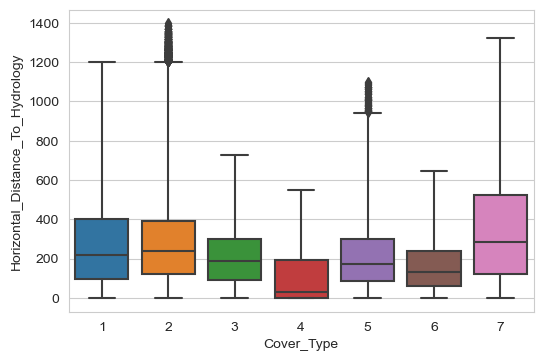

In [29]:
num_outliers(df, "Horizontal_Distance_To_Hydrology", whis=3)

<AxesSubplot:xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Hydrology'>

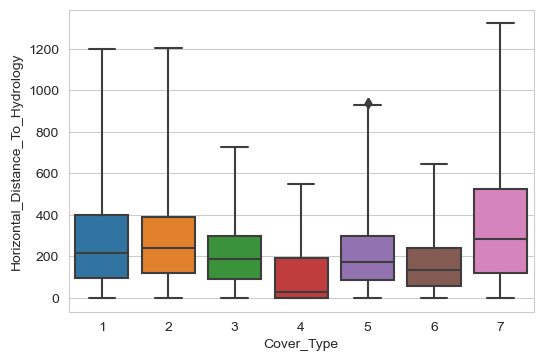

In [30]:
remove_outliers(df, "Horizontal_Distance_To_Hydrology", whis=3)

Vertical_Distance_To_Hydrology

Column_name : Vertical_Distance_To_Hydrology
whis : 3
-------------------------------------------
min_threshold: -170.0 
max_threshold: 236.0
Num_of_values for 1 : 211840
Num_of_outliers for 1 : 2293
-------------------------------------------
min_threshold: -166.0 
max_threshold: 240.0
Num_of_values for 2 : 283301
Num_of_outliers for 2 : 3511
-------------------------------------------
min_threshold: -213.0 
max_threshold: 326.0
Num_of_values for 3 : 35754
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -216.0 
max_threshold: 288.0
Num_of_values for 4 : 2747
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -219.0 
max_threshold: 306.0
Num_of_values for 5 : 9493
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: -187.0 
max_threshold: 268.0
Num_of_values for 6 : 17367
Num_of_outliers for 6 : 7
-------------------------------------------
min_threshold: -289.0 
max_threshold: 404.0


<AxesSubplot:xlabel='Cover_Type', ylabel='Vertical_Distance_To_Hydrology'>

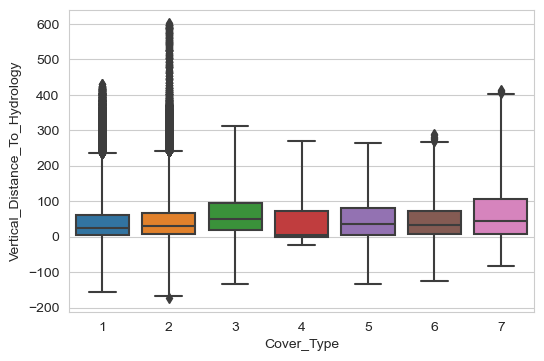

In [31]:
num_outliers(df, "Vertical_Distance_To_Hydrology", whis=3)

<AxesSubplot:xlabel='Cover_Type', ylabel='Vertical_Distance_To_Hydrology'>

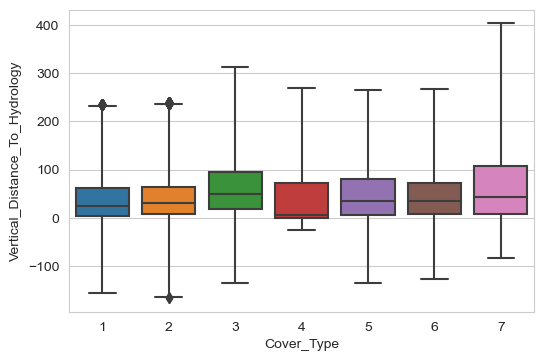

In [32]:
remove_outliers(df, "Vertical_Distance_To_Hydrology", whis=3)

Horizontal_Distance_To_Roadways

Column_name : Horizontal_Distance_To_Roadways
whis : 3
-------------------------------------------
min_threshold: -5272.0 
max_threshold: 10296.0
Num_of_values for 1 : 211840
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: -5672.0 
max_threshold: 10218.0
Num_of_values for 2 : 283301
Num_of_outliers for 2 : 0
-------------------------------------------
min_threshold: -2038.0 
max_threshold: 3786.0
Num_of_values for 3 : 35754
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -1158.0 
max_threshold: 3000.0
Num_of_values for 4 : 2747
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -4032.0 
max_threshold: 6447.0
Num_of_values for 5 : 9493
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: -1776.0 
max_threshold: 3768.0
Num_of_values for 6 : 17367
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: -4219.25 
max_thresh

<AxesSubplot:xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Roadways'>

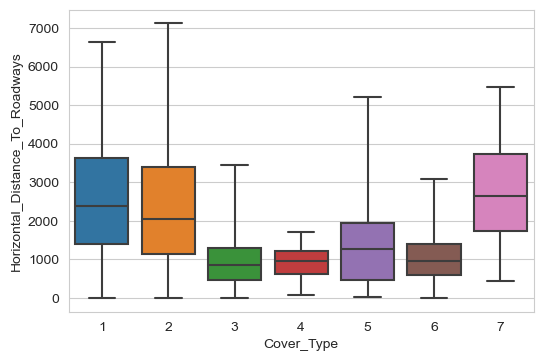

In [33]:
num_outliers(df, "Horizontal_Distance_To_Roadways", whis=3)

In [34]:
#remove_outliers(df, "Horizontal_Distance_To_Roadways", whis=3)

Hillshade_9am

Column_name : Hillshade_9am
whis : 3
-------------------------------------------
min_threshold: 106.0 
max_threshold: 323.0
Num_of_values for 1 : 211840
Num_of_outliers for 1 : 411
-------------------------------------------
min_threshold: 108.0 
max_threshold: 325.0
Num_of_values for 2 : 283301
Num_of_outliers for 2 : 610
-------------------------------------------
min_threshold: -16.0 
max_threshold: 425.0
Num_of_values for 3 : 35754
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: 113.0 
max_threshold: 351.0
Num_of_values for 4 : 2747
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: 121.0 
max_threshold: 331.0
Num_of_values for 5 : 9493
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: 12.0 
max_threshold: 376.0
Num_of_values for 6 : 17367
Num_of_outliers for 6 : 3
-------------------------------------------
min_threshold: 106.0 
max_threshold: 330.0
Num_of_values for 7 : 20510

<AxesSubplot:xlabel='Cover_Type', ylabel='Hillshade_9am'>

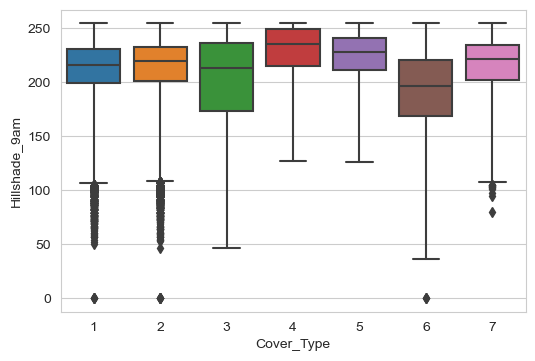

In [35]:
num_outliers(df, "Hillshade_9am", whis=3)

<AxesSubplot:xlabel='Cover_Type', ylabel='Hillshade_9am'>

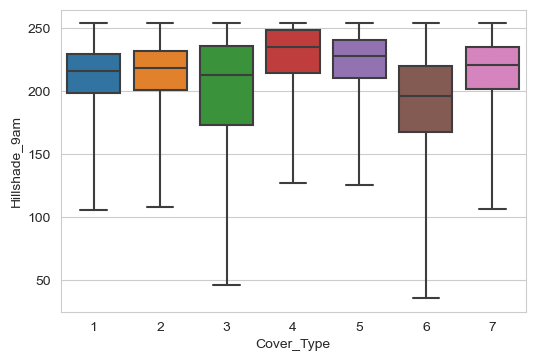

In [36]:
remove_outliers(df, "Hillshade_9am", whis=3)

Hillshade_Noon

Column_name : Hillshade_Noon
whis : 3
-------------------------------------------
min_threshold: 148.0 
max_threshold: 302.0
Num_of_values for 1 : 211840
Num_of_outliers for 1 : 430
-------------------------------------------
min_threshold: 143.0 
max_threshold: 311.0
Num_of_values for 2 : 283301
Num_of_outliers for 2 : 296
-------------------------------------------
min_threshold: 86.0 
max_threshold: 352.0
Num_of_values for 3 : 35754
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: 123.0 
max_threshold: 312.0
Num_of_values for 4 : 2747
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: 106.0 
max_threshold: 337.0
Num_of_values for 5 : 9493
Num_of_outliers for 5 : 12
-------------------------------------------
min_threshold: 103.0 
max_threshold: 320.0
Num_of_values for 6 : 17367
Num_of_outliers for 6 : 1
-------------------------------------------
min_threshold: 136.0 
max_threshold: 311.0
Num_of_values for 7 : 205

<AxesSubplot:xlabel='Cover_Type', ylabel='Hillshade_Noon'>

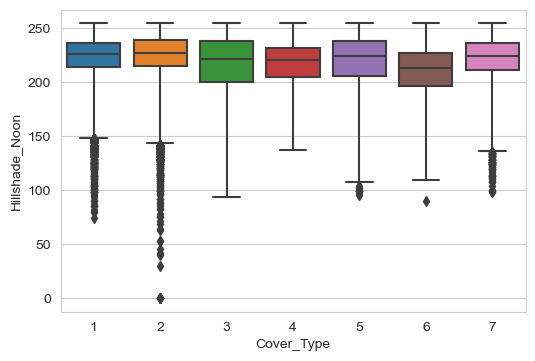

In [37]:
num_outliers(df, "Hillshade_Noon", whis=3) 

<AxesSubplot:xlabel='Cover_Type', ylabel='Hillshade_Noon'>

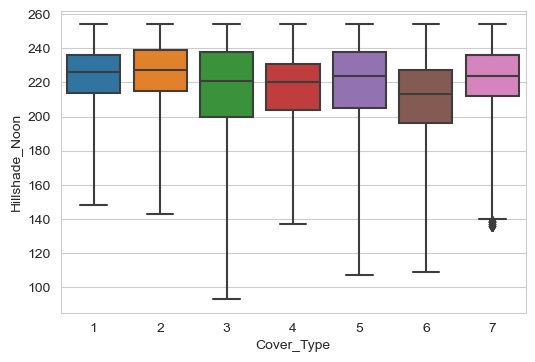

In [38]:
remove_outliers(df, "Hillshade_Noon", whis=3)

Hillshade_3pm

Column_name : Hillshade_3pm
whis : 3
-------------------------------------------
min_threshold: -20.0 
max_threshold: 309.0
Num_of_values for 1 : 211840
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: -21.0 
max_threshold: 308.0
Num_of_values for 2 : 283301
Num_of_outliers for 2 : 0
-------------------------------------------
min_threshold: -127.0 
max_threshold: 412.0
Num_of_values for 3 : 35754
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -151.0 
max_threshold: 374.0
Num_of_values for 4 : 2747
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -131.0 
max_threshold: 373.0
Num_of_values for 5 : 9493
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: -88.0 
max_threshold: 388.0
Num_of_values for 6 : 17367
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: -31.0 
max_threshold: 305.0
Num_of_values for 7 : 20510

<AxesSubplot:xlabel='Cover_Type', ylabel='Hillshade_3pm'>

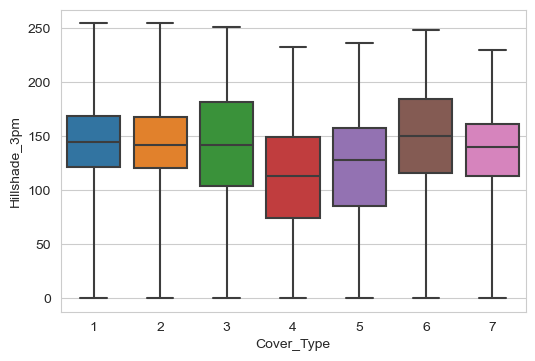

In [39]:
num_outliers(df, "Hillshade_3pm", whis=3)

In [40]:
#remove_outliers(df, "Hillshade_3pm", whis=3)

Horizontal_Distance_To_Fire_Points

Column_name : Horizontal_Distance_To_Fire_Points
whis : 3
-------------------------------------------
min_threshold: -3526.0 
max_threshold: 7268.0
Num_of_values for 1 : 211840
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: -3276.0 
max_threshold: 7105.0
Num_of_values for 2 : 283301
Num_of_outliers for 2 : 19
-------------------------------------------
min_threshold: -1551.0 
max_threshold: 3265.0
Num_of_values for 3 : 35754
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -1880.0 
max_threshold: 3594.0
Num_of_values for 4 : 2747
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -2335.0 
max_threshold: 5218.0
Num_of_values for 5 : 9493
Num_of_outliers for 5 : 295
-------------------------------------------
min_threshold: -1509.0 
max_threshold: 3510.0
Num_of_values for 6 : 17367
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: -3798.0 
max_thr

<AxesSubplot:xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Fire_Points'>

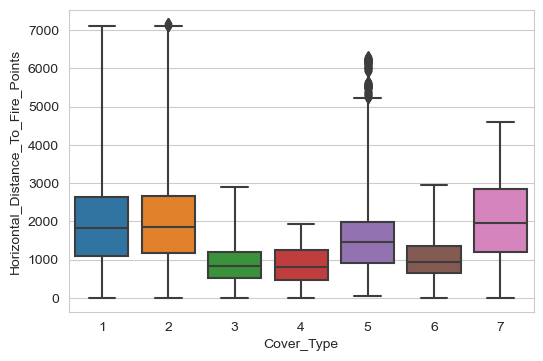

In [41]:
num_outliers(df, "Horizontal_Distance_To_Fire_Points", whis=3)

<AxesSubplot:xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Fire_Points'>

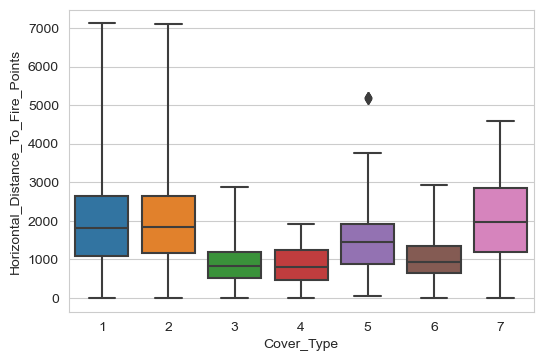

In [42]:
remove_outliers(df, "Horizontal_Distance_To_Fire_Points", whis=3)

In [43]:
tree.shape

(581012, 55)

In [44]:
df.shape

(581012, 55)

In [45]:
df.isnull().sum().sum()

8963

In [46]:
df.dropna(inplace=True)

In [47]:
df.isnull().sum().sum()

0

In [48]:
tree.shape[0] - df.shape[0] 

8385

## 3. Feature Engineering with *sqlite3* Library

In [49]:
import sqlite3

- Creation a ``sqlite`` database (``"tree_database"``) and transferring dataframe(``tree1``) from python into database table (``covtype2``)

In [50]:
# Creation of the connection and importing dataframe into database.
with sqlite3.connect("tree_database.db") as cnnct:
    df.to_sql("covtype2", cnnct, if_exists = "replace")

In [51]:
query1 = """SELECT *, (Horizontal_Distance_To_Hydrology*Horizontal_Distance_To_Hydrology)+
(Vertical_Distance_To_Hydrology*Vertical_Distance_To_Hydrology) as Square_Hypo_Distance
FROM covtype2;"""

In [52]:
query2 = """SELECT Elevation, Aspect, Slope, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm,
Horizontal_Distance_To_Fire_Points, Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4,
Soil_Type1, Soil_Type2, Soil_Type3, Soil_Type4, Soil_Type5, Soil_Type6, Soil_Type7, Soil_Type8,
Soil_Type9, Soil_Type10, Soil_Type11, Soil_Type12, Soil_Type13, Soil_Type14, Soil_Type15, Soil_Type16, Soil_Type17, 
Soil_Type18, Soil_Type19, Soil_Type20, Soil_Type21, Soil_Type22, Soil_Type23, Soil_Type24, Soil_Type25,
Soil_Type26, Soil_Type27, Soil_Type28, Soil_Type29, Soil_Type30, Soil_Type31, Soil_Type32, Soil_Type33, 
Soil_Type34, Soil_Type35, Soil_Type36, Soil_Type37, Soil_Type38, Soil_Type39, Soil_Type40, Cover_Type,
Square_Hypo_Distance
FROM covtype2;"""

In [53]:
with sqlite3.connect("tree_database.db") as cnnct:
    df1 = pd.read_sql_query(query1, cnnct)  # transforming and exporting to df1
    df1.to_sql("covtype2", cnnct, if_exists = "replace")  # importing again to dropping columns
    df2 = pd.read_sql_query(query2, cnnct)  # exporting table to df2

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572627 entries, 0 to 572626
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           572627 non-null  float64
 1   Aspect                              572627 non-null  int64  
 2   Slope                               572627 non-null  float64
 3   Horizontal_Distance_To_Roadways     572627 non-null  int64  
 4   Hillshade_9am                       572627 non-null  float64
 5   Hillshade_Noon                      572627 non-null  float64
 6   Hillshade_3pm                       572627 non-null  int64  
 7   Horizontal_Distance_To_Fire_Points  572627 non-null  float64
 8   Wilderness_Area1                    572627 non-null  int64  
 9   Wilderness_Area2                    572627 non-null  int64  
 10  Wilderness_Area3                    572627 non-null  int64  
 11  Wilderness_Area4          

## 4. Prediction (Multi-class Classification)

1. Model Building and Prediction

 - XGBoost (``XGBClassifier`` model from``xgboost`` module)
 - SVM (``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - KNN (``KNeighborsClassifier`` model from ``sklearn.neighbors`` module)
 - Random Forest (``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 

2. Visualizing the Result

- [yellowbrick], [seaborn] or [matplotlib] modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Data Preprocessing

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [56]:
X=df.drop(["Cover_Type"], axis=1)
y=df["Cover_Type"]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=101)

In [58]:
scaler = MinMaxScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling and Model Performance

In [51]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, auc, roc_curve, average_precision_score, precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [60]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision_weighted" : precision_score(y_train, y_train_pred, average = "weighted"),
                            "Recall_weighted" : recall_score(y_train, y_train_pred, average = "weighted"),                          
                            "f1_weighted" : f1_score(y_train, y_train_pred, average = "weighted")},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision_weighted" : precision_score(y_test, y_pred, average = "weighted"),
                           "Recall_weighted" : recall_score(y_test, y_pred, average = "weighted"),                          
                           "f1_weighted" : f1_score(y_test, y_pred, average = "weighted")}}
    
    return pd.DataFrame(scores)

In [61]:
def model_performance(y_train, y_train_pred, y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print("-------------------------------------------------------")
    print(classification_report(y_test, y_pred))
    print("-------------------------------------------------------")
    print(train_val(y_train, y_train_pred, y_test, y_pred))

In [62]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

In [63]:
def plot_multiclass_roc_for_svm(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

### Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [65]:
log_model=LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_proba=log_model.predict_proba(X_test_scaled)
y_pred=log_model.predict(X_test_scaled)
y_train_pred=log_model.predict(X_train_scaled)
model_performance(y_train, y_train_pred, y_test, y_pred)

[[43435 17892    20     0     9    12  1258]
 [14938 66665  1398    13    75   442   119]
 [    0  1081  8503   261     8   873     0]
 [    0     1   420   301     0   102     0]
 [   10  2542    97     0    72    22     0]
 [    0  1237  2734    54    18  1164     0]
 [ 2713    27     1     0     0     0  3272]]
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.71      0.69      0.70     62626
           2       0.75      0.80      0.77     83650
           3       0.65      0.79      0.71     10726
           4       0.48      0.37      0.41       824
           5       0.40      0.03      0.05      2743
           6       0.45      0.22      0.30      5207
           7       0.70      0.54      0.61      6013

    accuracy                           0.72    171789
   macro avg       0.59      0.49      0.51    171789
weighted avg       0.71      0.72      0.71    171789

-------------------------------

In [66]:
log_model=LogisticRegression(class_weight = "balanced")
log_model.fit(X_train_scaled, y_train)
y_pred_proba=log_model.predict_proba(X_test_scaled)
y_pred=log_model.predict(X_test_scaled)
y_train_pred=log_model.predict(X_train_scaled)
model_performance(y_train, y_train_pred, y_test, y_pred)

[[41045 10999    54     0  2643   361  7524]
 [19191 43129  1641    54 15488  3421   726]
 [    0    31  5840  1498   491  2866     0]
 [    0     0    52   719     0    53     0]
 [   41   348   102     0  2108   144     0]
 [    0    79  1150   390   229  3359     0]
 [  667     0     0     0     1     0  5345]]
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.67      0.66      0.66     62626
           2       0.79      0.52      0.62     83650
           3       0.66      0.54      0.60     10726
           4       0.27      0.87      0.41       824
           5       0.10      0.77      0.18      2743
           6       0.33      0.65      0.44      5207
           7       0.39      0.89      0.55      6013

    accuracy                           0.59    171789
   macro avg       0.46      0.70      0.49    171789
weighted avg       0.70      0.59      0.62    171789

-------------------------------

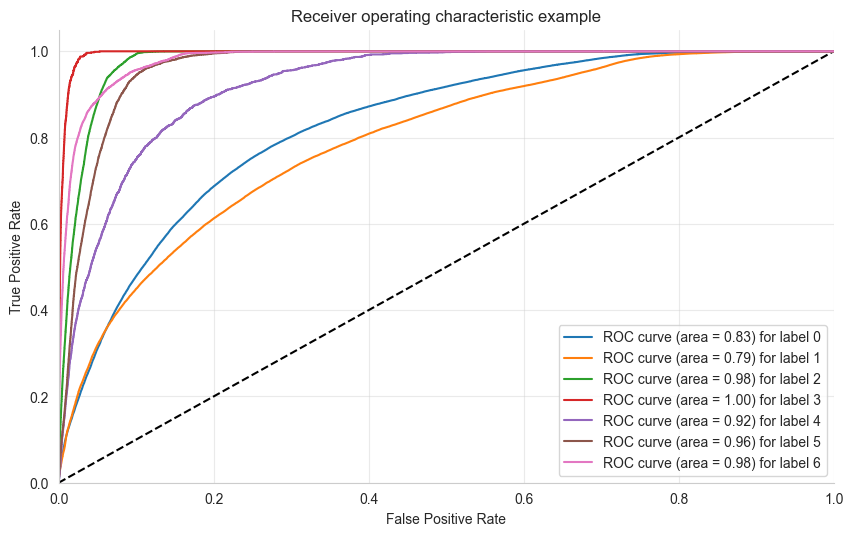

In [67]:
plot_multiclass_roc(log_model, X_test_scaled, y_test, n_classes=7, figsize=(10, 6))

In [68]:
log_acc = accuracy_score(y_test, y_pred)
log_f1 = f1_score(y_test, y_pred, average = "weighted")
log_f1_4 = f1_score(y_test, y_pred, labels = [4], average = None)
log_f1_5 = f1_score(y_test, y_pred, labels = [5], average = None)
log_f1_6 = f1_score(y_test, y_pred, labels = [6], average = None)
log_auc = roc_auc_score(y_test, y_pred_proba, average = "weighted", multi_class = "ovo")

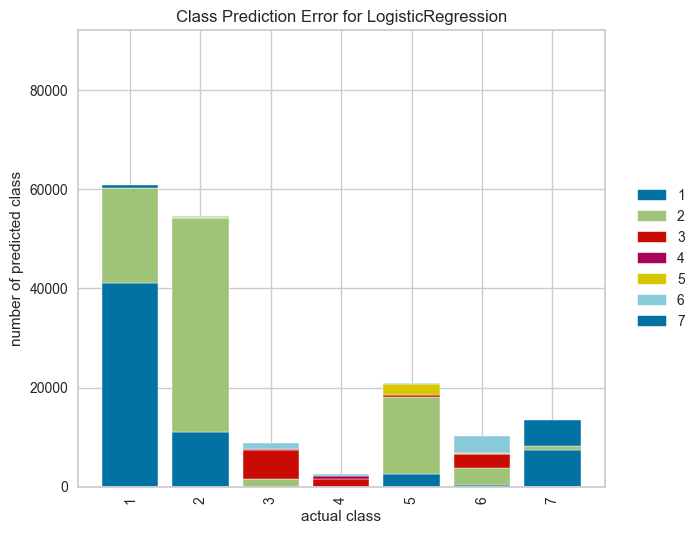

<AxesSubplot:title={'center':'Class Prediction Error for LogisticRegression'}, xlabel='actual class', ylabel='number of predicted class'>

In [69]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(log_model)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

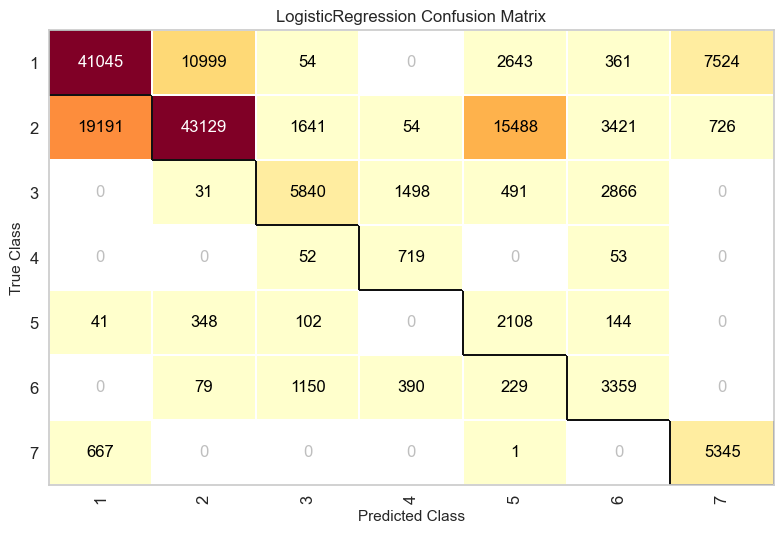

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [70]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(log_model)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show()

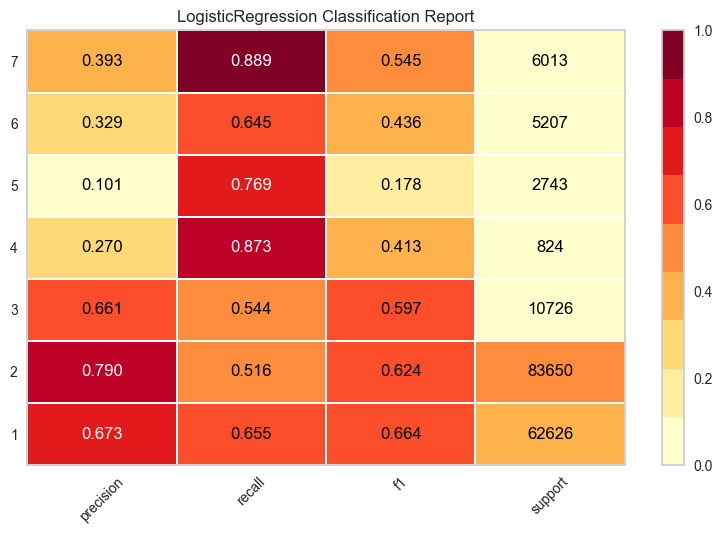

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [71]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(log_model, support=True)
visualizer.fit(X_train_scaled, y_train)        
visualizer.score(X_test_scaled, y_test)        
visualizer.show()

### KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
'''
test_error_rates = []

for k in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors=k, algorithm = "kd_tree")
    knn_model.fit(X_train_scaled, y_train) 
    y_pred = knn_model.predict(X_test_scaled)
    
    test_error = 1 - f1_score(y_test, y_pred, average = "weighted")
    test_error_rates.append(test_error)
'''

'\ntest_error_rates = []\n\nfor k in range(1,20):\n    knn_model = KNeighborsClassifier(n_neighbors=k, algorithm = "kd_tree")\n    knn_model.fit(X_train_scaled, y_train) \n    y_pred = knn_model.predict(X_test_scaled)\n    \n    test_error = 1 - f1_score(y_test, y_pred, average = "weighted")\n    test_error_rates.append(test_error)\n'

In [74]:
'''
plt.figure(figsize=(15,8))
plt.plot(range(1,20), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.05, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.06, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
'''

'\nplt.figure(figsize=(15,8))\nplt.plot(range(1,20), test_error_rates, color=\'blue\', linestyle=\'--\', marker=\'o\',\n         markerfacecolor=\'red\', markersize=10)\nplt.title(\'Error Rate vs. K Value\')\nplt.xlabel(\'K_values\')\nplt.ylabel(\'Error Rate\')\nplt.hlines(y=0.05, xmin = 0, xmax = 30, colors= \'r\', linestyles="--")\nplt.hlines(y=0.06, xmin = 0, xmax = 30, colors= \'r\', linestyles="--")\n'

In [75]:
knn_model = KNeighborsClassifier(n_neighbors=5, algorithm = "kd_tree") 
knn_model.fit(X_train_scaled, y_train)
y_pred_proba=knn_model.predict_proba(X_test_scaled)
y_pred=knn_model.predict(X_test_scaled)
y_train_pred=knn_model.predict(X_train_scaled)
model_performance(y_train, y_train_pred, y_test, y_pred)

[[57826  4417     3     0    49    19   312]
 [ 3739 79122   209     2   309   211    58]
 [    7   260  9897    73    18   471     0]
 [    0     1   144   626     0    53     0]
 [   67   475    48     0  2144     9     0]
 [   17   290   545    27    14  4314     0]
 [  320    57     0     0     0     0  5636]]
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.93      0.92      0.93     62626
           2       0.94      0.95      0.94     83650
           3       0.91      0.92      0.92     10726
           4       0.86      0.76      0.81       824
           5       0.85      0.78      0.81      2743
           6       0.85      0.83      0.84      5207
           7       0.94      0.94      0.94      6013

    accuracy                           0.93    171789
   macro avg       0.90      0.87      0.88    171789
weighted avg       0.93      0.93      0.93    171789

-------------------------------

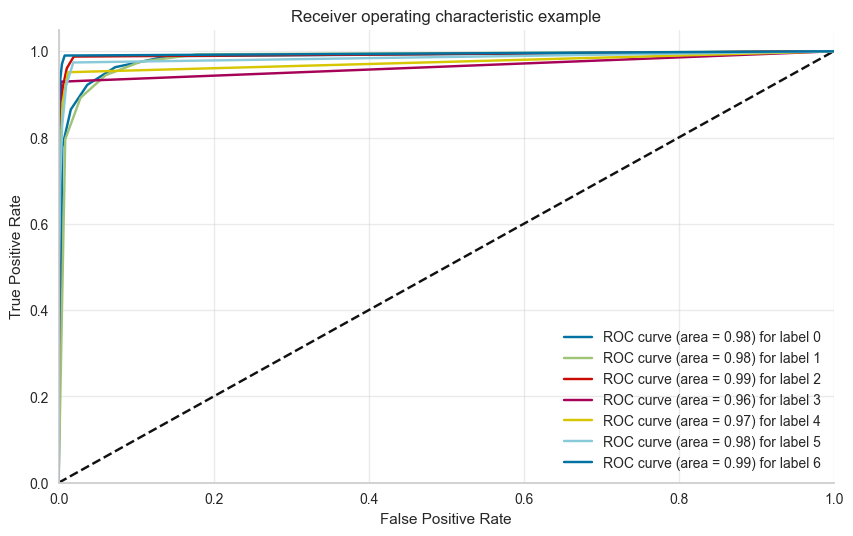

In [76]:
plot_multiclass_roc(knn_model, X_test_scaled, y_test, n_classes=7, figsize=(10, 6))

In [77]:
knn_acc = accuracy_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred, average = "weighted")
knn_f1_4 = f1_score(y_test, y_pred, labels = [4], average = None)
knn_f1_5 = f1_score(y_test, y_pred, labels = [5], average = None)
knn_f1_6 = f1_score(y_test, y_pred, labels = [6], average = None)
knn_auc = roc_auc_score(y_test, y_pred_proba, average = "weighted", multi_class = "ovo")

In [78]:
#from yellowbrick.classifier import ClassPredictionError

#visualizer = ClassPredictionError(knn_model)
#visualizer.fit(X_train_scaled, y_train)
#visualizer.score(X_test_scaled, y_test)
#visualizer.show()


In [79]:
#from yellowbrick.classifier import ConfusionMatrix

#cm = ConfusionMatrix(knn_model)
#cm.fit(X_train_scaled, y_train)
#cm.score(X_test_scaled, y_test)
#cm.show()

In [80]:
#from yellowbrick.classifier import ClassificationReport

#visualizer = ClassificationReport(knn_model, support=True)
#visualizer.fit(X_train_scaled, y_train)        
#visualizer.score(X_test_scaled, y_test)        
#visualizer.show()

### SVM

In [54]:
from sklearn.svm import SVC, LinearSVC 

In [82]:
svm_model = LinearSVC(class_weight = "balanced", random_state = 38)
svm_model.fit(X_train_scaled, y_train)
y_pred_proba=svm_model.decision_function(X_test_scaled)
y_pred=svm_model.predict(X_test_scaled)
y_train_pred=svm_model.predict(X_train_scaled)
model_performance(y_train, y_train_pred, y_test, y_pred)

[[41692 14275    66     0   900   442  5251]
 [17358 57822  2243    23  3150  2683   371]
 [    0   402  7640   622   100  1962     0]
 [    0     0   203   543     0    78     0]
 [   37  1301   283     0  1048    74     0]
 [    0   433  1783   210   229  2552     0]
 [ 1009    22     1     0     1     0  4980]]
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.69      0.67      0.68     62626
           2       0.78      0.69      0.73     83650
           3       0.63      0.71      0.67     10726
           4       0.39      0.66      0.49       824
           5       0.19      0.38      0.26      2743
           6       0.33      0.49      0.39      5207
           7       0.47      0.83      0.60      6013

    accuracy                           0.68    171789
   macro avg       0.50      0.63      0.55    171789
weighted avg       0.70      0.68      0.69    171789

-------------------------------

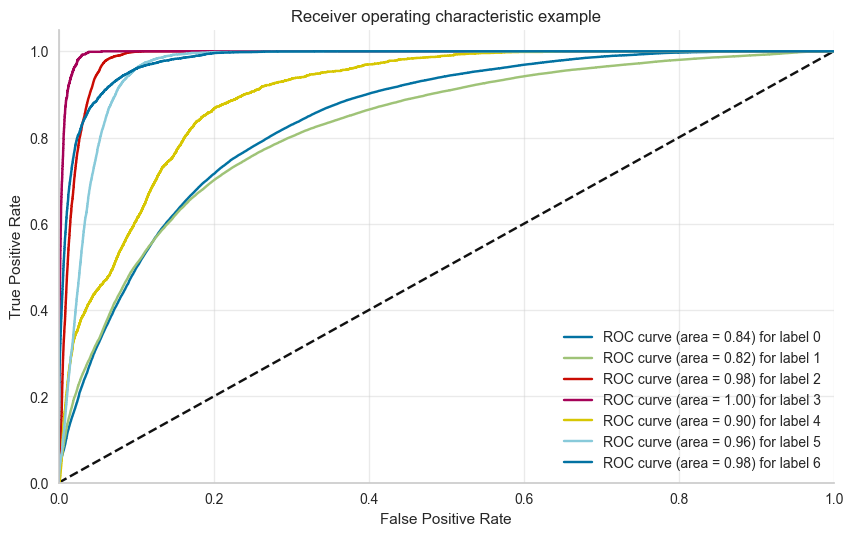

In [83]:
plot_multiclass_roc_for_svm(svm_model, X_test_scaled, y_test, n_classes=7, figsize=(10, 6))

In [84]:
svm_acc = accuracy_score(y_test, y_pred)
svm_f1 = f1_score(y_test, y_pred, average = "weighted")
svm_f1_4 = f1_score(y_test, y_pred, labels = [4], average = None)
svm_f1_5 = f1_score(y_test, y_pred, labels = [5], average = None)
svm_f1_6 = f1_score(y_test, y_pred, labels = [6], average = None)
#svm_auc = roc_auc_score(y_test, y_pred_proba, average = "weighted", multi_class = "ovo")

In [85]:
#from yellowbrick.classifier import ClassPredictionError

#visualizer = ClassPredictionError(svm_model)
#visualizer.fit(X_train_scaled, y_train)
#visualizer.score(X_test_scaled, y_test)
#visualizer.show()

In [86]:
#from yellowbrick.classifier import ConfusionMatrix

#cm = ConfusionMatrix(svm_model)
#cm.fit(X_train_scaled, y_train)
#cm.score(X_test_scaled, y_test)
#cm.show()

In [87]:
#from yellowbrick.classifier import ClassificationReport

#visualizer = ClassificationReport(svm_model, support=True)
#visualizer.fit(X_train_scaled, y_train)        
#visualizer.score(X_test_scaled, y_test)        
#visualizer.show()

### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=38)
rf_model.fit(X_train, y_train)
y_pred_proba=rf_model.predict_proba(X_test)
y_pred=rf_model.predict(X_test)
y_train_pred=rf_model.predict(X_train)
model_performance(y_train, y_train_pred, y_test, y_pred)

[[58961  3495     2     0    18    13   137]
 [ 2020 81206   176     1   115   104    28]
 [    2   174 10280    41     6   223     0]
 [    0     0    98   709     0    17     0]
 [   24   526    46     0  2136    11     0]
 [    3   190   415    24     5  4570     0]
 [  290    31     0     0     0     0  5692]]
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     62626
           2       0.95      0.97      0.96     83650
           3       0.93      0.96      0.95     10726
           4       0.91      0.86      0.89       824
           5       0.94      0.78      0.85      2743
           6       0.93      0.88      0.90      5207
           7       0.97      0.95      0.96      6013

    accuracy                           0.95    171789
   macro avg       0.94      0.90      0.92    171789
weighted avg       0.95      0.95      0.95    171789

-------------------------------

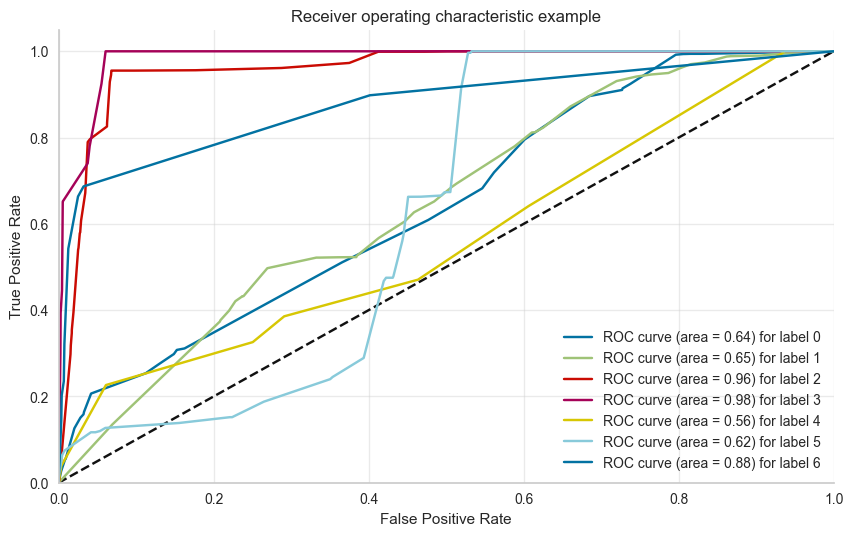

In [90]:
plot_multiclass_roc(rf_model, X_test_scaled, y_test, n_classes=7, figsize=(10, 6))

In [91]:
rf_acc = accuracy_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred, average = "weighted")
rf_f1_4 = f1_score(y_test, y_pred, labels = [4], average = None)
rf_f1_5 = f1_score(y_test, y_pred, labels = [5], average = None)
rf_f1_6 = f1_score(y_test, y_pred, labels = [6], average = None)
rf_auc = roc_auc_score(y_test, y_pred_proba, average = "weighted", multi_class = "ovo")

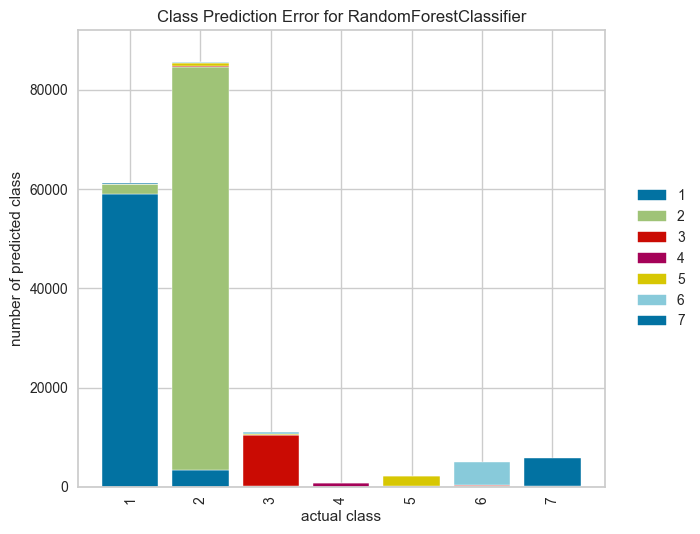

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [92]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(rf_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

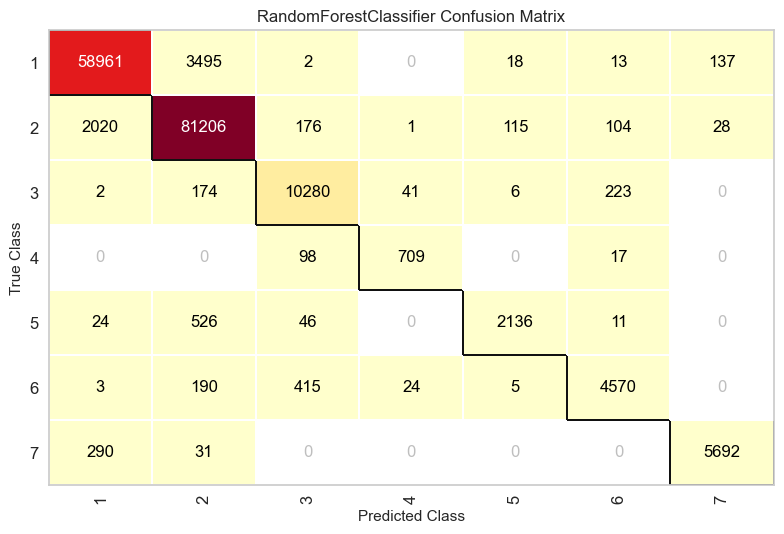

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [93]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(rf_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

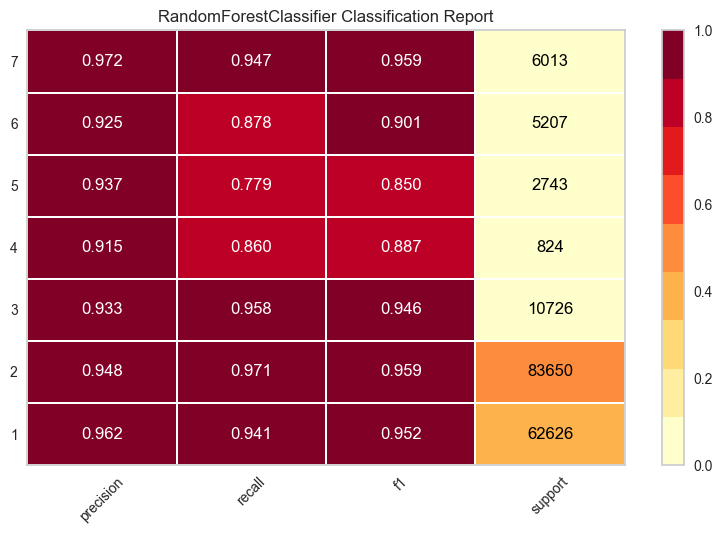

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [94]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(rf_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

### XGBoost

In [95]:
from xgboost import XGBClassifier

In [96]:
xgb_model = XGBClassifier(random_state=38)
xgb_model.fit(X_train, y_train)
y_pred_proba=xgb_model.predict_proba(X_test)
y_pred=xgb_model.predict(X_test)
y_train_pred=xgb_model.predict(X_train)
model_performance(y_train, y_train_pred, y_test, y_pred)

[15:12:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[52292  9990     1     0    24     9   310]
 [ 8023 74856   321     1   195   213    41]
 [    2   442  9773    52     1   456     0]
 [    0     0    72   725     0    27     0]
 [   26   976    65     0  1669     7     0]
 [    6   283   664    22     4  4228     0]
 [  486    16     0     0     0     0  5511]]
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.86      0.83      0.85     62626
           2       0.86      0.89      0.88     83650
           3       0.90      0.91      0.90     10726
           4       0.91      0.88      0.89       824
           5       0.88      0.61      0.72   

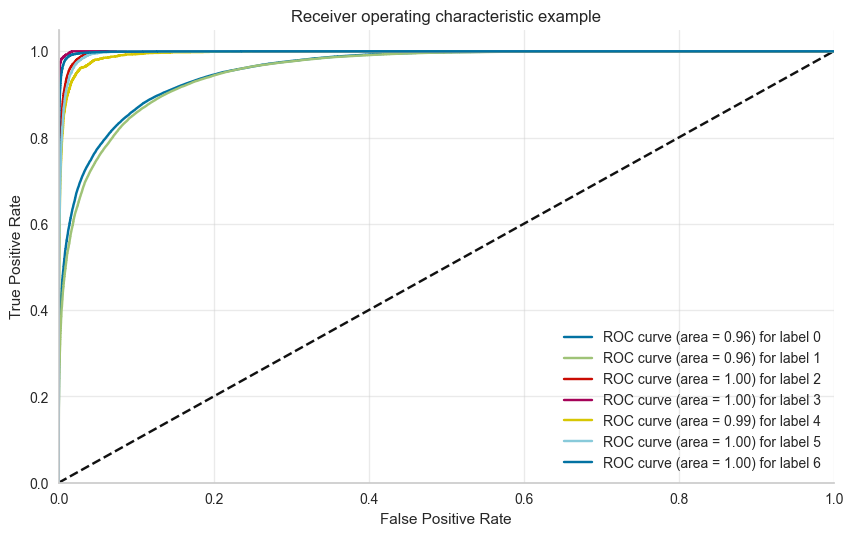

In [97]:
plot_multiclass_roc(xgb_model, X_test, y_test, n_classes=7, figsize=(10, 6))

In [98]:
xgb_acc = accuracy_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred, average = "weighted")
xgb_f1_4 = f1_score(y_test, y_pred, labels = [4], average = None)
xgb_f1_5 = f1_score(y_test, y_pred, labels = [5], average = None)
xgb_f1_6 = f1_score(y_test, y_pred, labels = [6], average = None)
xgb_auc = roc_auc_score(y_test, y_pred_proba, average = "weighted", multi_class = "ovo")

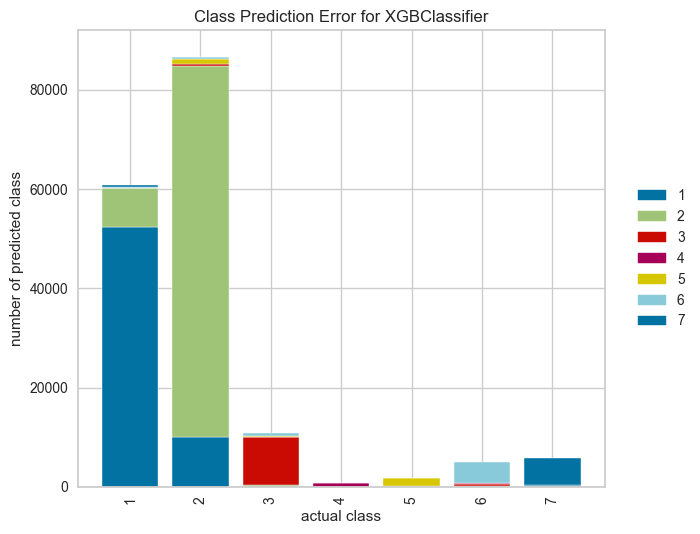

<AxesSubplot:title={'center':'Class Prediction Error for XGBClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [99]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(xgb_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

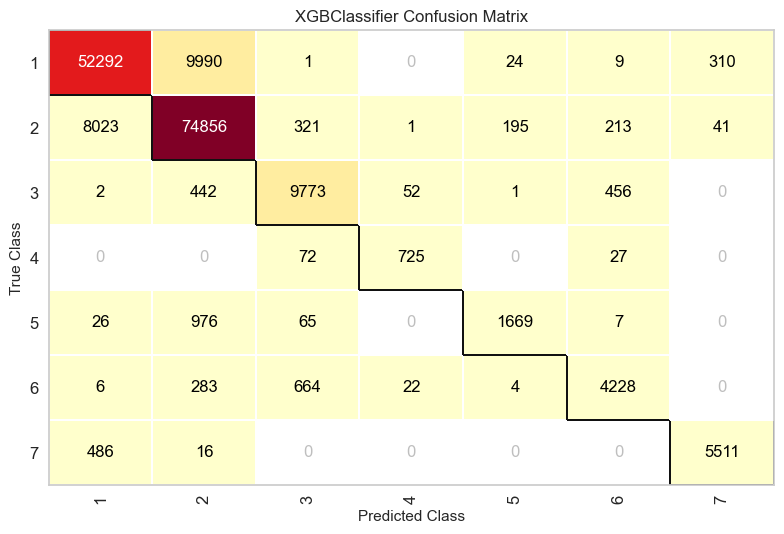

<AxesSubplot:title={'center':'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [100]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(xgb_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

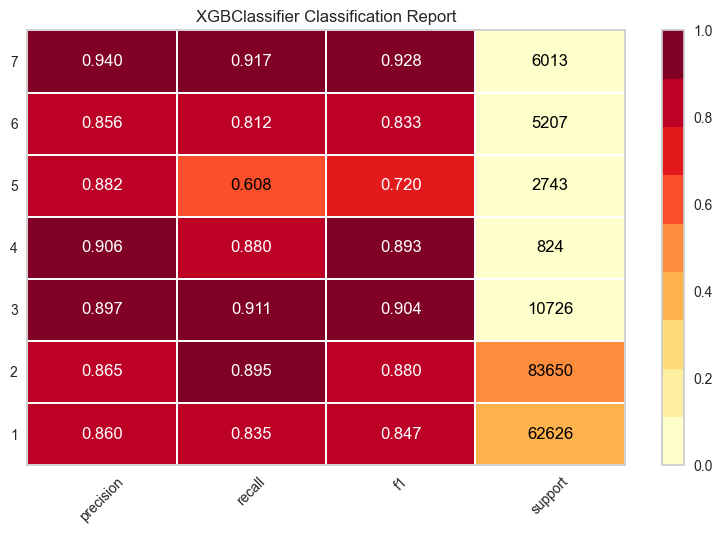

<AxesSubplot:title={'center':'XGBClassifier Classification Report'}>

In [101]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(xgb_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

### LightGBM

LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

- Faster training speed and higher efficiency.
- Lower memory usage.
- Better accuracy.
- Support of parallel, distributed, and GPU learning.
- Capable of handling large-scale data.

In [102]:
#!pip install lightgbm

In [103]:
from lightgbm import LGBMClassifier

In [104]:
lgb_model = LGBMClassifier(random_state=38)
lgb_model.fit(X_train, y_train)
y_pred_proba=lgb_model.predict_proba(X_test)
y_pred=lgb_model.predict(X_test)
y_train_pred=lgb_model.predict(X_train)
model_performance(y_train, y_train_pred, y_test, y_pred)

[[51269 10928     1     0    39    10   379]
 [ 8302 74279   394     8   303   325    39]
 [    0   445  9709    79     6   487     0]
 [    0     0   120   668     0    36     0]
 [   17   902    61     0  1756     7     0]
 [    4   332   697    44     4  4126     0]
 [  571    19     0     0     0     0  5423]]
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.85      0.82      0.84     62626
           2       0.85      0.89      0.87     83650
           3       0.88      0.91      0.89     10726
           4       0.84      0.81      0.82       824
           5       0.83      0.64      0.72      2743
           6       0.83      0.79      0.81      5207
           7       0.93      0.90      0.91      6013

    accuracy                           0.86    171789
   macro avg       0.86      0.82      0.84    171789
weighted avg       0.86      0.86      0.86    171789

-------------------------------

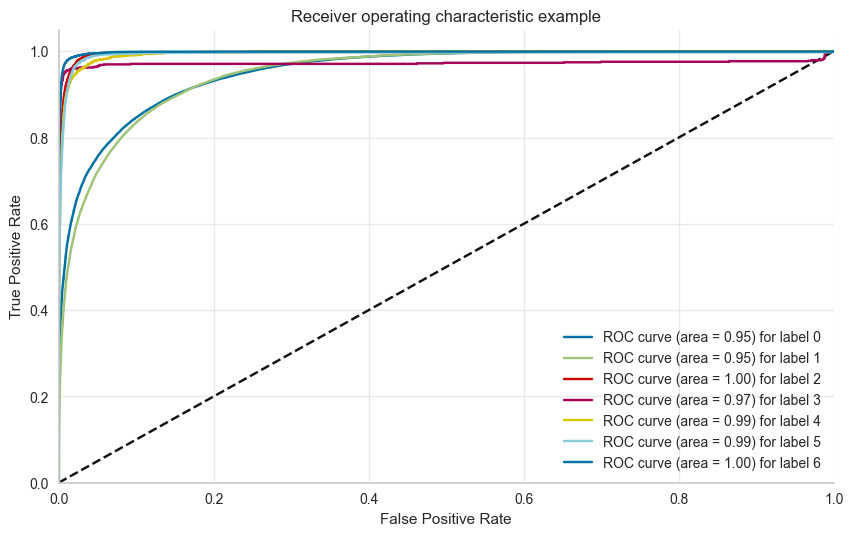

In [105]:
plot_multiclass_roc(lgb_model, X_test, y_test, n_classes=7, figsize=(10, 6))

In [106]:
lgb_acc = accuracy_score(y_test, y_pred)
lgb_f1 = f1_score(y_test, y_pred, average = "weighted")
lgb_f1_4 = f1_score(y_test, y_pred, labels = [4], average = None)
lgb_f1_5 = f1_score(y_test, y_pred, labels = [5], average = None)
lgb_f1_6 = f1_score(y_test, y_pred, labels = [6], average = None)
lgb_auc = roc_auc_score(y_test, y_pred_proba, average = "weighted", multi_class = "ovo")

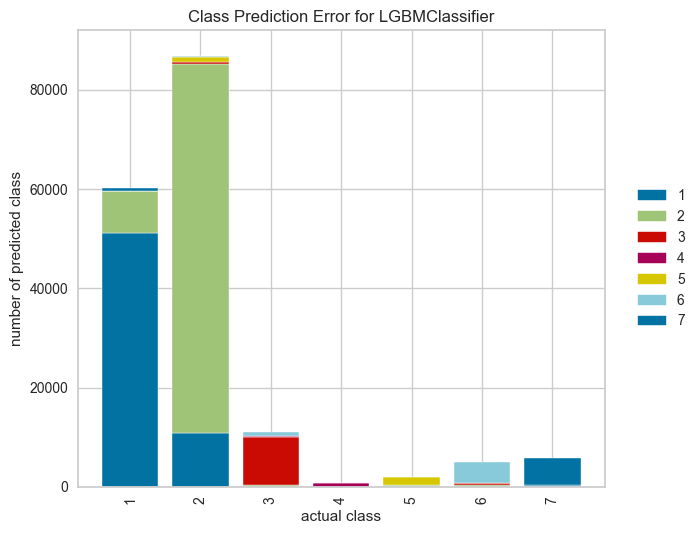

<AxesSubplot:title={'center':'Class Prediction Error for LGBMClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [107]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(lgb_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

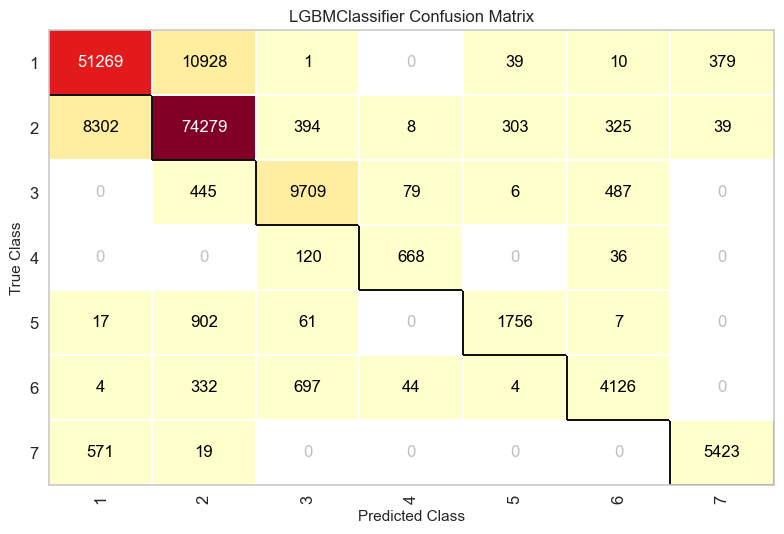

<AxesSubplot:title={'center':'LGBMClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [108]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(lgb_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

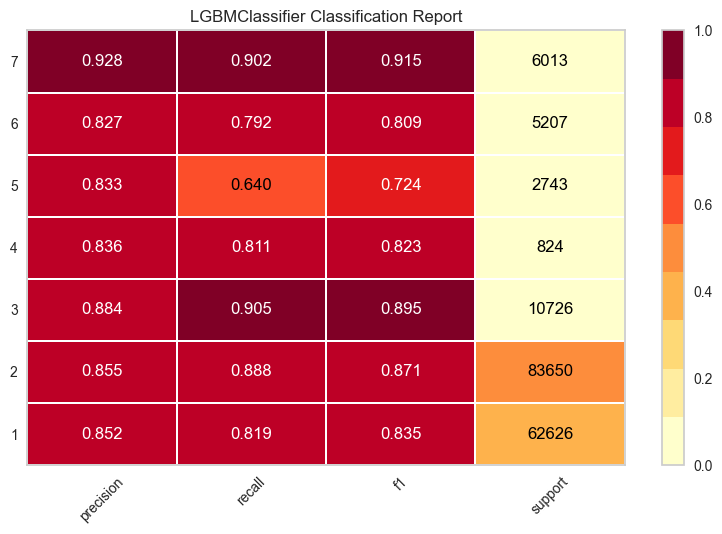

<AxesSubplot:title={'center':'LGBMClassifier Classification Report'}>

In [109]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(lgb_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

### Comparing

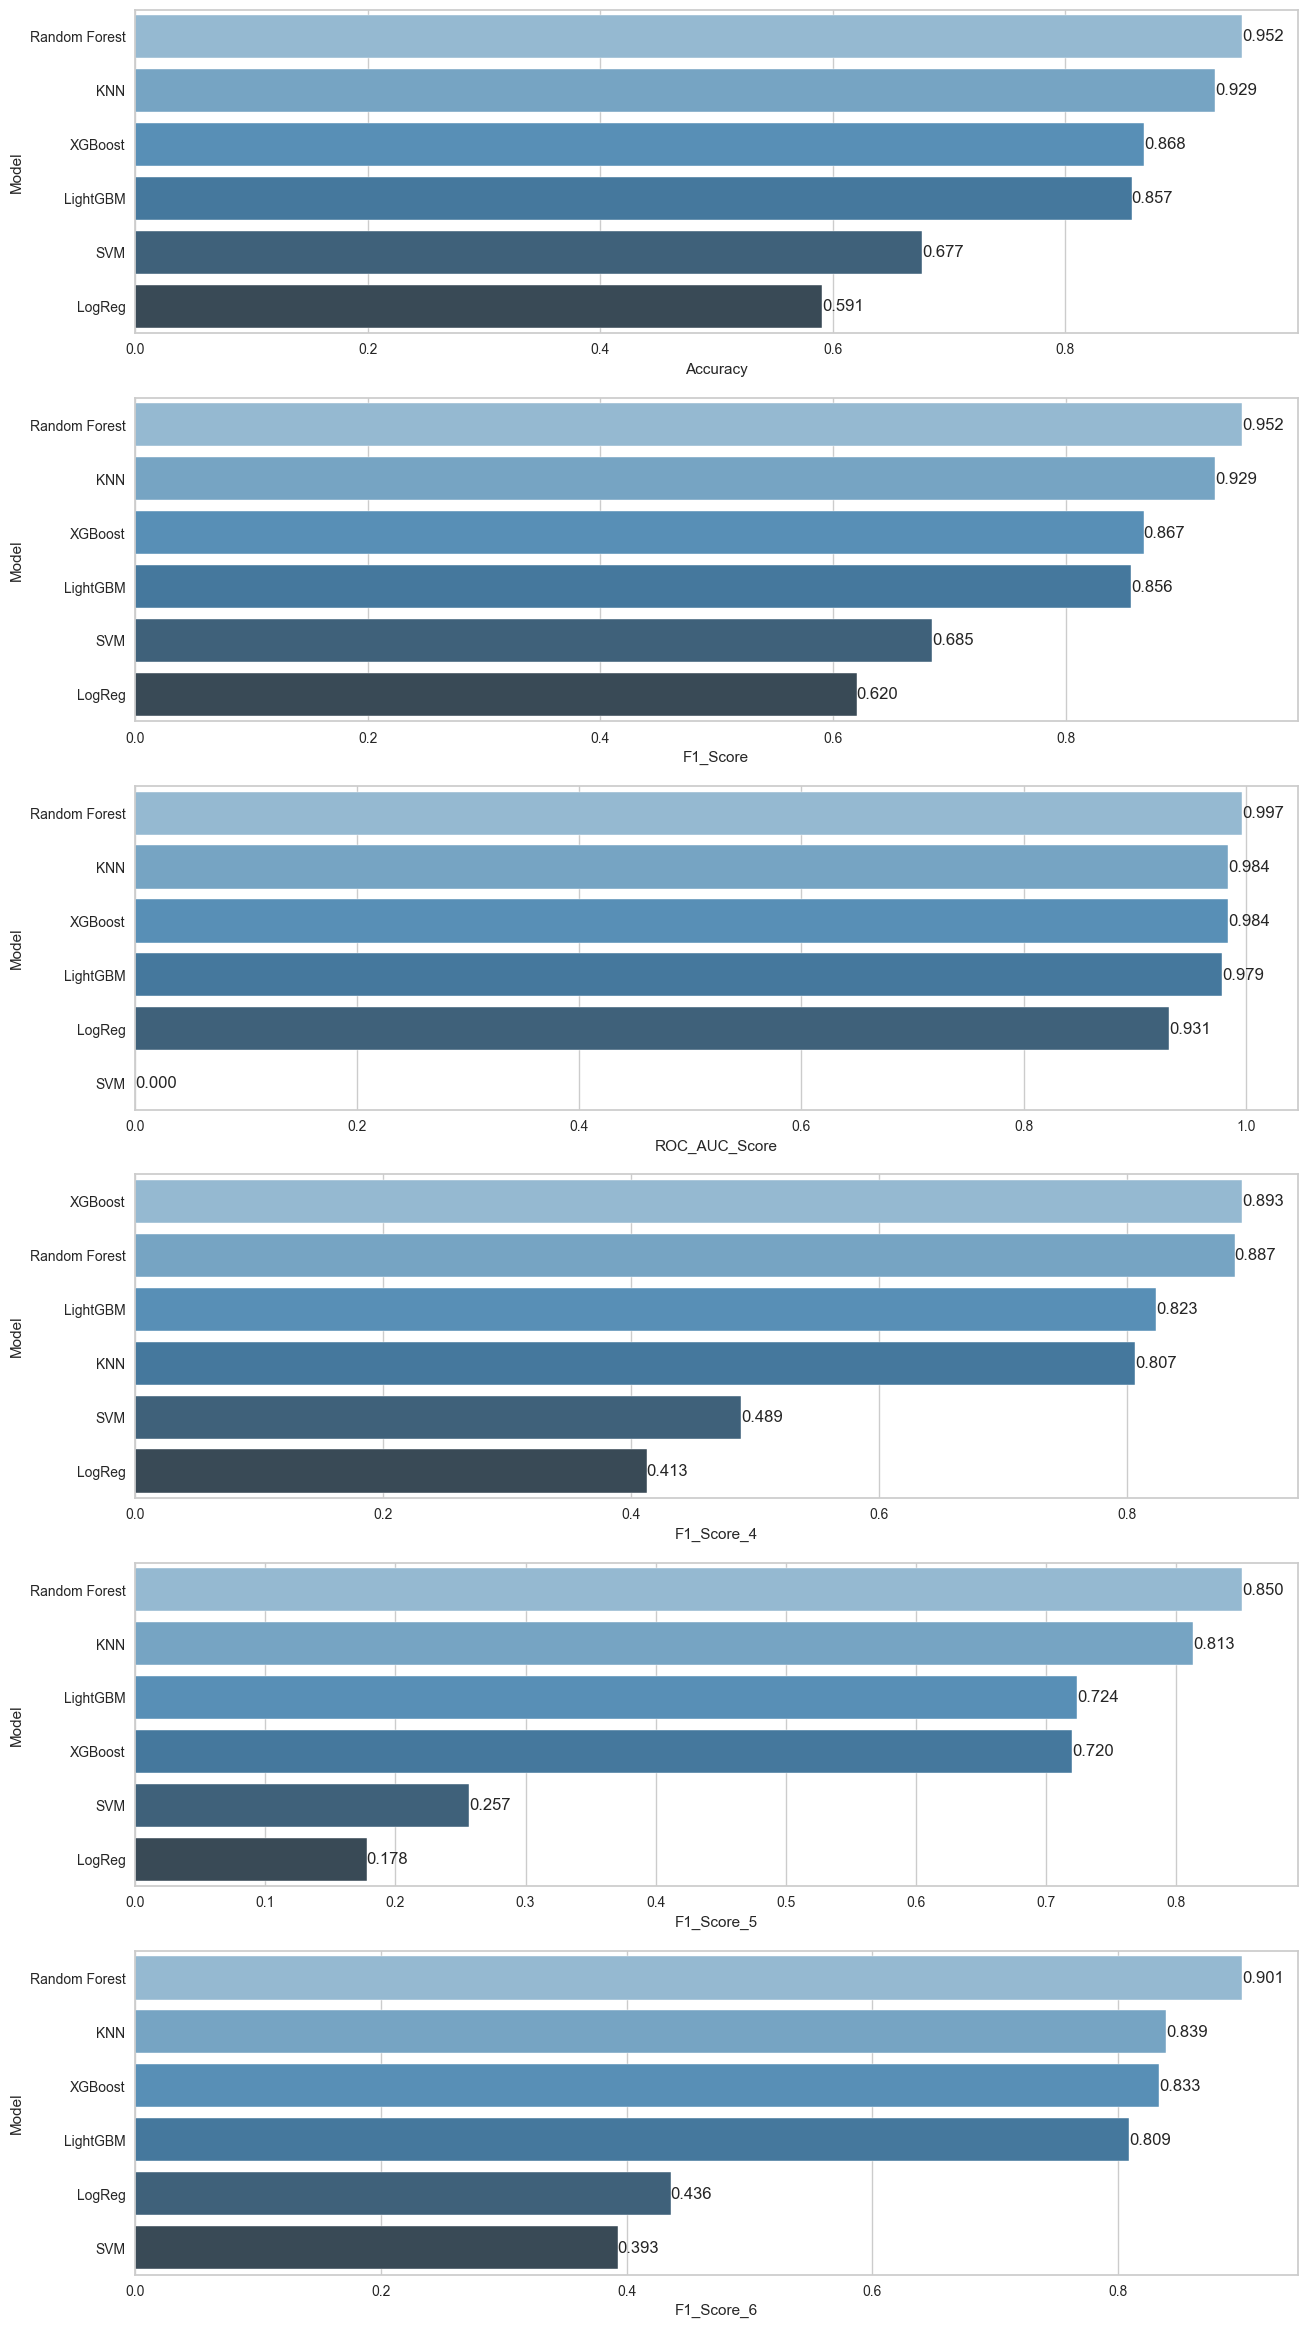

In [115]:
compare = pd.DataFrame({"Model": ["LogReg", "KNN", "SVM", "Random Forest", "XGBoost", "LightGBM"],
                        "Accuracy": [log_acc, knn_acc, svm_acc, rf_acc, xgb_acc, lgb_acc],
                        "F1_Score": [log_f1, knn_f1, svm_f1, rf_f1, xgb_f1, lgb_f1],
                        "F1_Score_4": [log_f1_4[0], knn_f1_4[0], svm_f1_4[0], rf_f1_4[0], xgb_f1_4[0], lgb_f1_4[0]],
                        "F1_Score_5": [log_f1_5[0], knn_f1_5[0], svm_f1_5[0], rf_f1_5[0], xgb_f1_5[0], lgb_f1_5[0]],
                        "F1_Score_6": [log_f1_6[0], knn_f1_6[0], svm_f1_6[0], rf_f1_6[0], xgb_f1_6[0], lgb_f1_6[0]],
                        "ROC_AUC_Score": [log_auc, knn_auc, 0, rf_auc, xgb_auc, lgb_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(611)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(612)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(613)
compare = compare.sort_values(by="ROC_AUC_Score", ascending=False)
ax=sns.barplot(x="ROC_AUC_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(614)
compare = compare.sort_values(by="F1_Score_4", ascending=False)
ax=sns.barplot(x="F1_Score_4", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(615)
compare = compare.sort_values(by="F1_Score_5", ascending=False)
ax=sns.barplot(x="F1_Score_5", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(616)
compare = compare.sort_values(by="F1_Score_6", ascending=False)
ax=sns.barplot(x="F1_Score_6", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

## SMOTE - Synthetic Minority Oversampling TEchnique

In [116]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [117]:
y_train.value_counts()

2    195181
1    146126
3     25028
7     14029
6     12149
5      6402
4      1923
Name: Cover_Type, dtype: int64

In [118]:
over = SMOTE(sampling_strategy= {4: 15000,
                                 5: 15000,
                                 6: 15000,
                                 7: 15000}, random_state = 38)
under = RandomUnderSampler(sampling_strategy= {1: 30000,
                                               2: 30000}, random_state = 38)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [119]:
y_resampled.value_counts()

1    30000
2    30000
3    25028
4    15000
5    15000
6    15000
7    15000
Name: Cover_Type, dtype: int64

In [120]:
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
log_model=LogisticRegression()
log_model.fit(X_resampled_scaled, y_resampled)
y_pred_proba=log_model.predict_proba(X_test_scaled)
y_pred=log_model.predict(X_test_scaled)
y_train_pred=log_model.predict(X_resampled_scaled)
model_performance(y_resampled, y_train_pred, y_test, y_pred)

[[44614 11916    60     0  1078   137  4821]
 [20590 50377  2501    16  7796  2033   337]
 [    0   177  8090   915   234  1310     0]
 [    0     0   131   625     0    68     0]
 [  102   840   174     0  1552    75     0]
 [    0   220  2331   209   144  2303     0]
 [  977     0     0     0     1     0  5035]]
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.67      0.71      0.69     62626
           2       0.79      0.60      0.68     83650
           3       0.61      0.75      0.67     10726
           4       0.35      0.76      0.48       824
           5       0.14      0.57      0.23      2743
           6       0.39      0.44      0.41      5207
           7       0.49      0.84      0.62      6013

    accuracy                           0.66    171789
   macro avg       0.49      0.67      0.54    171789
weighted avg       0.70      0.66      0.67    171789

-------------------------------

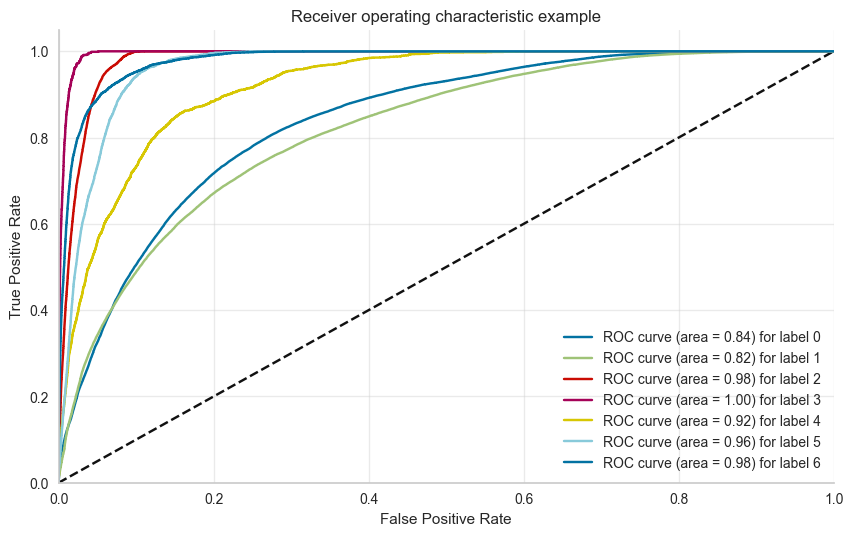

In [123]:
plot_multiclass_roc(log_model, X_test_scaled, y_test, n_classes=7, figsize=(10, 6))

In [124]:
log_s_acc = accuracy_score(y_test, y_pred)
log_s_f1 = f1_score(y_test, y_pred, average = "weighted")
log_s_f1_4 = f1_score(y_test, y_pred, labels = [4], average = None)
log_s_f1_5 = f1_score(y_test, y_pred, labels = [5], average = None)
log_s_f1_6 = f1_score(y_test, y_pred, labels = [6], average = None)
log_s_auc = roc_auc_score(y_test, y_pred_proba, average = "weighted", multi_class = "ovo")

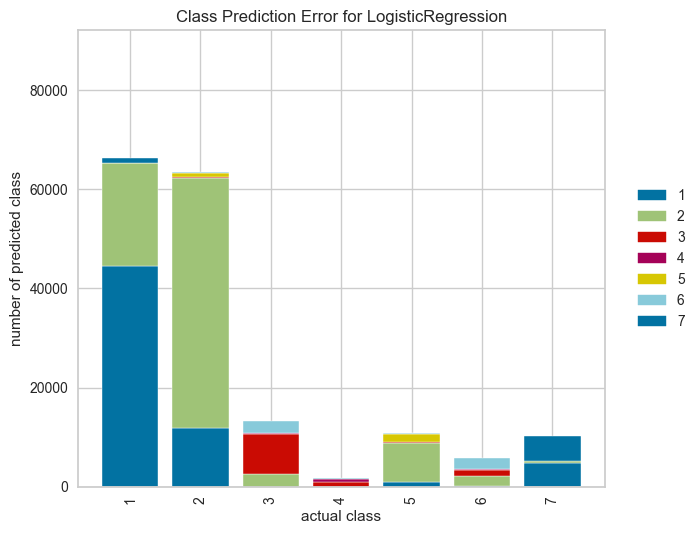

<AxesSubplot:title={'center':'Class Prediction Error for LogisticRegression'}, xlabel='actual class', ylabel='number of predicted class'>

In [125]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(log_model)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

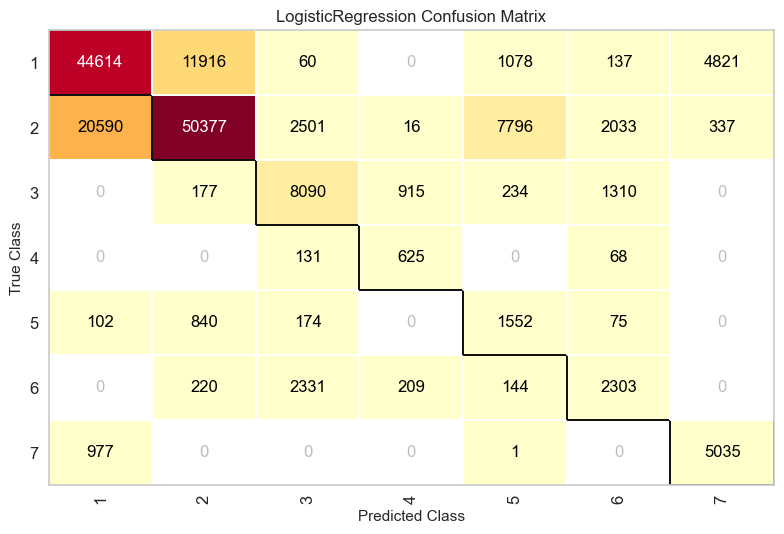

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [126]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(log_model)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show()

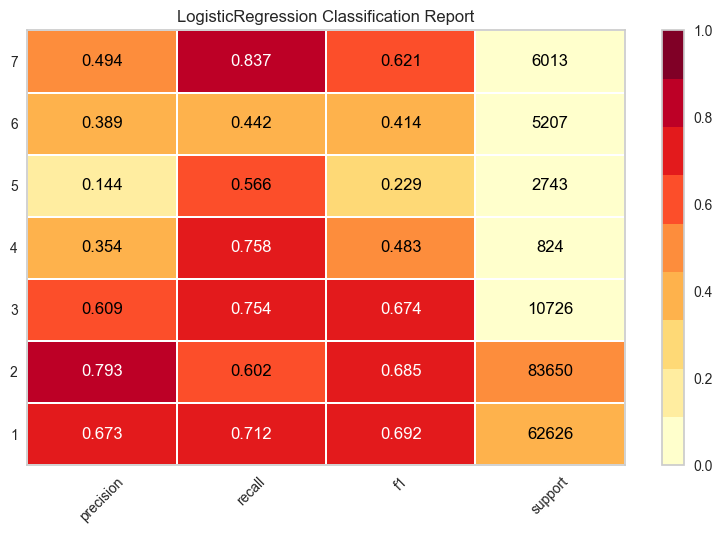

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [127]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(log_model, support=True)
visualizer.fit(X_train_scaled, y_train)        
visualizer.score(X_test_scaled, y_test)        
visualizer.show()

### KNN

In [128]:
from sklearn.neighbors import KNeighborsClassifier

In [129]:
'''
test_error_rates = []

for k in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors=k, algorithm = "kd_tree")
    knn_model.fit(X_resampled_scaled, y_resampled) 
    y_pred = knn_model.predict(X_test_scaled)
    
    test_error = 1 - f1_score(y_test, y_pred, average = "weighted")
    test_error_rates.append(test_error)
'''

'\ntest_error_rates = []\n\nfor k in range(1,20):\n    knn_model = KNeighborsClassifier(n_neighbors=k, algorithm = "kd_tree")\n    knn_model.fit(X_resampled_scaled, y_resampled) \n    y_pred = knn_model.predict(X_test_scaled)\n    \n    test_error = 1 - f1_score(y_test, y_pred, average = "weighted")\n    test_error_rates.append(test_error)\n'

In [130]:
'''
plt.figure(figsize=(15,8))
plt.plot(range(1,20), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.05, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.06, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
'''

'\nplt.figure(figsize=(15,8))\nplt.plot(range(1,20), test_error_rates, color=\'blue\', linestyle=\'--\', marker=\'o\',\n         markerfacecolor=\'red\', markersize=10)\nplt.title(\'Error Rate vs. K Value\')\nplt.xlabel(\'K_values\')\nplt.ylabel(\'Error Rate\')\nplt.hlines(y=0.05, xmin = 0, xmax = 30, colors= \'r\', linestyles="--")\nplt.hlines(y=0.06, xmin = 0, xmax = 30, colors= \'r\', linestyles="--")\n'

In [131]:
knn_model = KNeighborsClassifier(n_neighbors=5, algorithm = "kd_tree")
knn_model.fit(X_resampled_scaled, y_resampled)
y_pred_proba=knn_model.predict_proba(X_test_scaled)
y_pred=knn_model.predict(X_test_scaled)
y_train_pred=knn_model.predict(X_resampled_scaled)
model_performance(y_resampled, y_train_pred, y_test, y_pred)

[[54012  6406    22     0   494    91  1601]
 [ 8854 68881  1208    18  3181  1229   279]
 [    0    51  9837   218    45   575     0]
 [    0     0    67   729     0    28     0]
 [   22    87    45     0  2575    14     0]
 [    4    39   511    82    28  4543     0]
 [   93    15     0     0     0     0  5905]]
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.86      0.86      0.86     62626
           2       0.91      0.82      0.87     83650
           3       0.84      0.92      0.88     10726
           4       0.70      0.88      0.78       824
           5       0.41      0.94      0.57      2743
           6       0.70      0.87      0.78      5207
           7       0.76      0.98      0.86      6013

    accuracy                           0.85    171789
   macro avg       0.74      0.90      0.80    171789
weighted avg       0.87      0.85      0.86    171789

-------------------------------

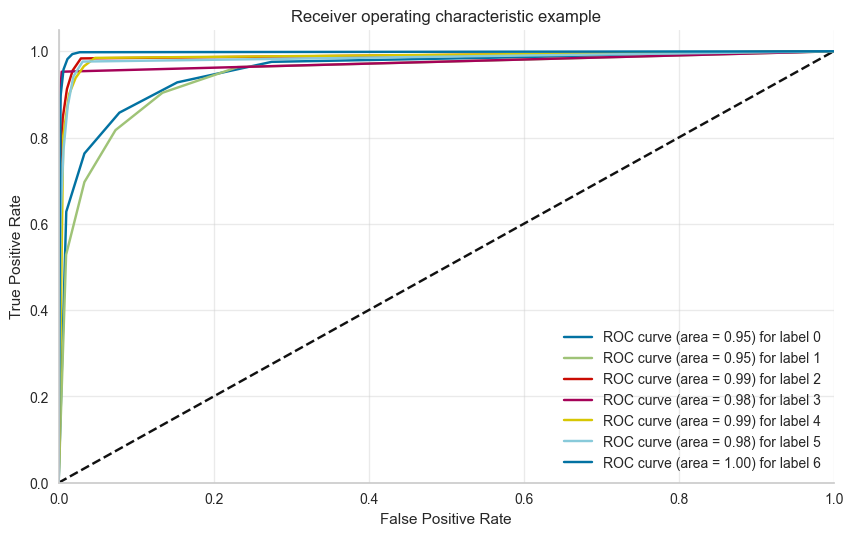

In [132]:
plot_multiclass_roc(knn_model, X_test_scaled, y_test, n_classes=7, figsize=(10, 6))

In [133]:
knn_s_acc = accuracy_score(y_test, y_pred)
knn_s_f1 = f1_score(y_test, y_pred, average = "weighted")
knn_s_f1_4 = f1_score(y_test, y_pred, labels = [4], average = None)
knn_s_f1_5 = f1_score(y_test, y_pred, labels = [5], average = None)
knn_s_f1_6 = f1_score(y_test, y_pred, labels = [6], average = None)
knn_s_auc = roc_auc_score(y_test, y_pred_proba, average = "weighted", multi_class = "ovo")

In [134]:
#from yellowbrick.classifier import ClassPredictionError

#visualizer = ClassPredictionError(knn_model)
#visualizer.fit(X_train_scaled, y_train)
#visualizer.score(X_test_scaled, y_test)
#visualizer.show()

In [135]:
#from yellowbrick.classifier import ConfusionMatrix

#cm = ConfusionMatrix(knn_model)
#cm.fit(X_train_scaled, y_train)
#cm.score(X_test_scaled, y_test)
#cm.show()

In [136]:
#from yellowbrick.classifier import ClassificationReport

#visualizer = ClassificationReport(knn_model, support=True)
#visualizer.fit(X_train_scaled, y_train)        
#visualizer.score(X_test_scaled, y_test)        
#visualizer.show()

### SVM

In [137]:
from sklearn.svm import SVC, LinearSVC

In [138]:
svm_model = LinearSVC(random_state = 38)
svm_model.fit(X_resampled_scaled, y_resampled)
y_pred_proba=svm_model.decision_function(X_test_scaled)
y_pred=svm_model.predict(X_test_scaled)
y_train_pred=svm_model.predict(X_resampled_scaled)
model_performance(y_resampled, y_train_pred, y_test, y_pred)

[[43501 11014    79     0  1409   439  6184]
 [22613 47215  3301    13  7657  2405   446]
 [    0   136  8631   735   255   969     0]
 [    0     0   145   635     0    44     0]
 [  146   870   339     0  1312    76     0]
 [    0   310  2649   237   335  1676     0]
 [  999    15     1     0    10     0  4988]]
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.65      0.69      0.67     62626
           2       0.79      0.56      0.66     83650
           3       0.57      0.80      0.67     10726
           4       0.39      0.77      0.52       824
           5       0.12      0.48      0.19      2743
           6       0.30      0.32      0.31      5207
           7       0.43      0.83      0.57      6013

    accuracy                           0.63    171789
   macro avg       0.46      0.64      0.51    171789
weighted avg       0.69      0.63      0.64    171789

-------------------------------

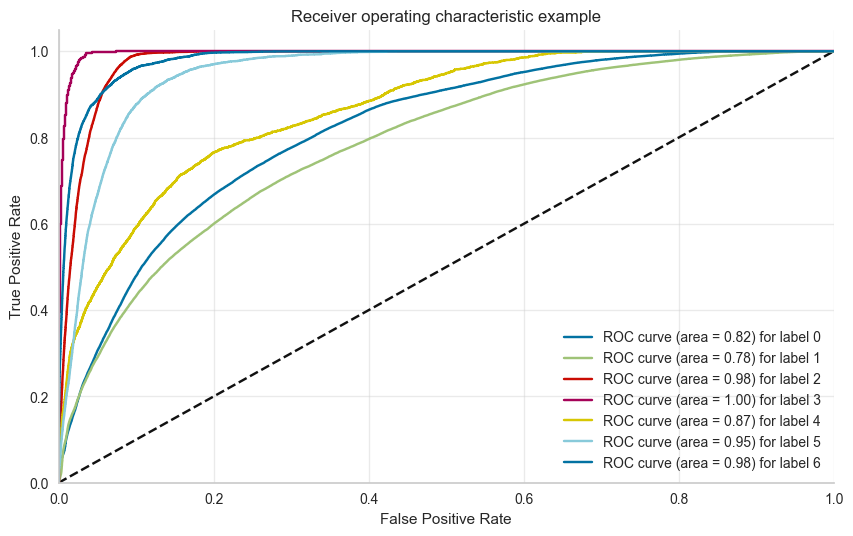

In [139]:
plot_multiclass_roc_for_svm(svm_model, X_test_scaled, y_test, n_classes=7, figsize=(10, 6))

In [140]:
svm_s_acc = accuracy_score(y_test, y_pred)
svm_s_f1 = f1_score(y_test, y_pred, average = "weighted")
svm_s_f1_4 = f1_score(y_test, y_pred, labels = [4], average = None)
svm_s_f1_5 = f1_score(y_test, y_pred, labels = [5], average = None)
svm_s_f1_6 = f1_score(y_test, y_pred, labels = [6], average = None)
#svm_s_auc = roc_auc_score(y_test, y_pred_proba, average = "weighted", multi_class = "ovo")

In [141]:
#from yellowbrick.classifier import ClassPredictionError

#visualizer = ClassPredictionError(svm_model)
#visualizer.fit(X_train_scaled, y_train)
#visualizer.score(X_test_scaled, y_test)
#visualizer.show()

In [142]:
#from yellowbrick.classifier import ConfusionMatrix

#cm = ConfusionMatrix(svm_model)
#cm.fit(X_train_scaled, y_train)
#cm.score(X_test_scaled, y_test)
#cm.show()

In [143]:
#from yellowbrick.classifier import ClassificationReport

#visualizer = ClassificationReport(svm_model, support=True)
#visualizer.fit(X_train_scaled, y_train)        
#visualizer.score(X_test_scaled, y_test)        
#visualizer.show()

### Random Forest

In [144]:
from sklearn.ensemble import RandomForestClassifier

In [145]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=38)
rf_model.fit(X_resampled, y_resampled)
y_pred_proba=rf_model.predict_proba(X_test)
y_pred=rf_model.predict(X_test)
y_train_pred=rf_model.predict(X_resampled)
model_performance(y_resampled, y_train_pred, y_test, y_pred)

[[56416  5184    25     0   163    59   779]
 [ 6027 74623   960     9  1102   824   105]
 [    1    26 10347    69    13   270     0]
 [    0     0    56   755     0    13     0]
 [    9   107    43     0  2574    10     0]
 [    1    22   371    37     9  4767     0]
 [  100     4     0     0     0     0  5909]]
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.90      0.90      0.90     62626
           2       0.93      0.89      0.91     83650
           3       0.88      0.96      0.92     10726
           4       0.87      0.92      0.89       824
           5       0.67      0.94      0.78      2743
           6       0.80      0.92      0.86      5207
           7       0.87      0.98      0.92      6013

    accuracy                           0.90    171789
   macro avg       0.85      0.93      0.88    171789
weighted avg       0.91      0.90      0.91    171789

-------------------------------

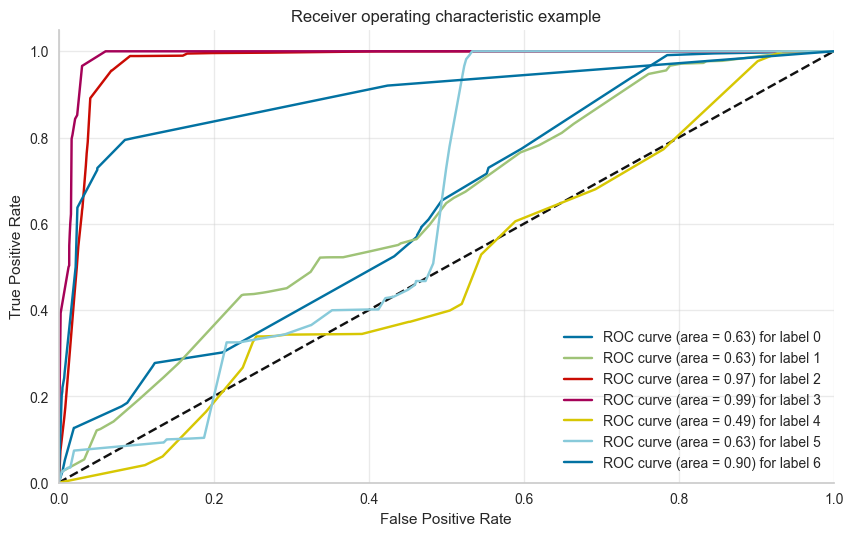

In [146]:
plot_multiclass_roc(rf_model, X_test_scaled, y_test, n_classes=7, figsize=(10, 6))

In [147]:
rf_s_acc = accuracy_score(y_test, y_pred)
rf_s_f1 = f1_score(y_test, y_pred, average = "weighted")
rf_s_f1_4 = f1_score(y_test, y_pred, labels = [4], average = None)
rf_s_f1_5 = f1_score(y_test, y_pred, labels = [5], average = None)
rf_s_f1_6 = f1_score(y_test, y_pred, labels = [6], average = None)
rf_s_auc = roc_auc_score(y_test, y_pred_proba, average = "weighted", multi_class = "ovo")

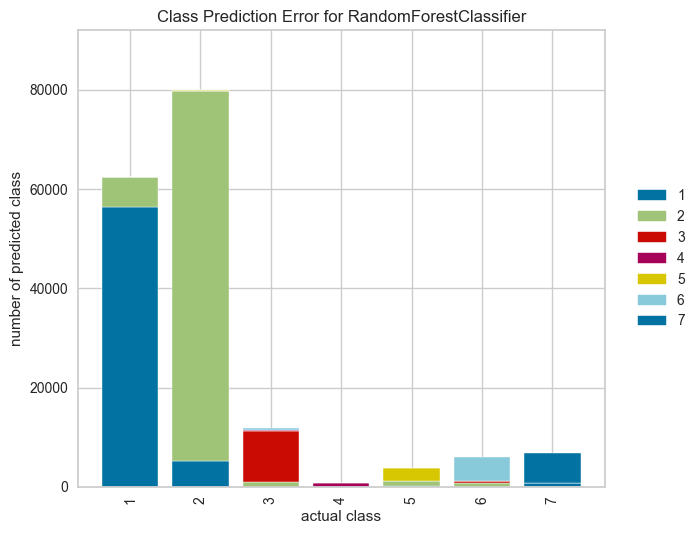

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [148]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(rf_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

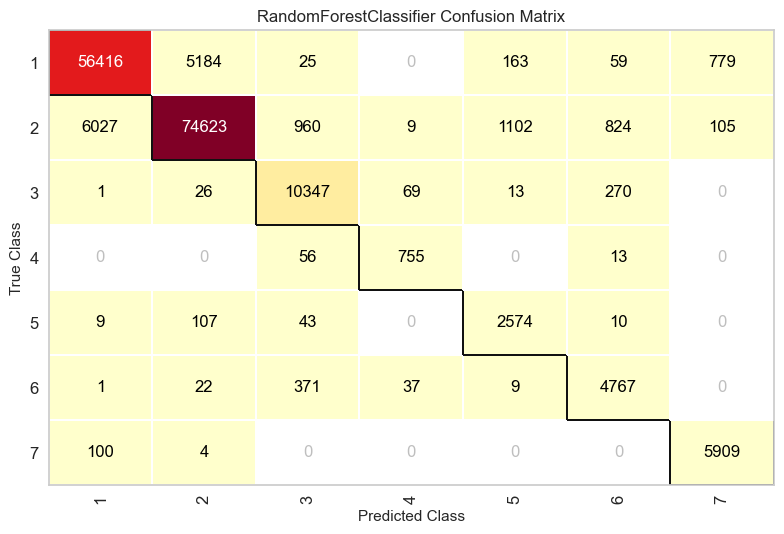

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [149]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(rf_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

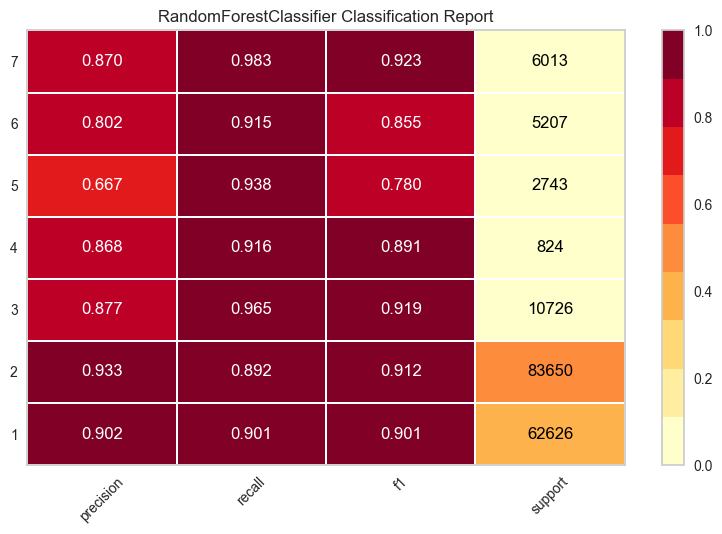

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [150]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(rf_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

### XGBoost

In [151]:
from xgboost import XGBClassifier

In [152]:
xgb_model = XGBClassifier(random_state=38)
xgb_model.fit(X_resampled_scaled, y_resampled)
y_pred_proba=xgb_model.predict_proba(X_test_scaled)
y_pred=xgb_model.predict(X_test_scaled)
y_train_pred=xgb_model.predict(X_resampled_scaled)
model_performance(y_resampled, y_train_pred, y_test, y_pred)

[15:59:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[52791  8034    25     0   450    58  1268]
 [12309 66008  1194     4  2809  1168   158]
 [    0    37  9957    89    30   613     0]
 [    0     0    47   758     0    19     0]
 [    2   135    56     0  2539    11     0]
 [    4    30   512    32    15  4614     0]
 [  111     3     0     0     0     0  5899]]
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.81      0.84      0.83     62626
           2       0.89      0.79      0.84     83650
           3       0.84      0.93      0.88     10726
           4       0.86      0.92      0.89       824
           5       0.43      0.93      0.59   

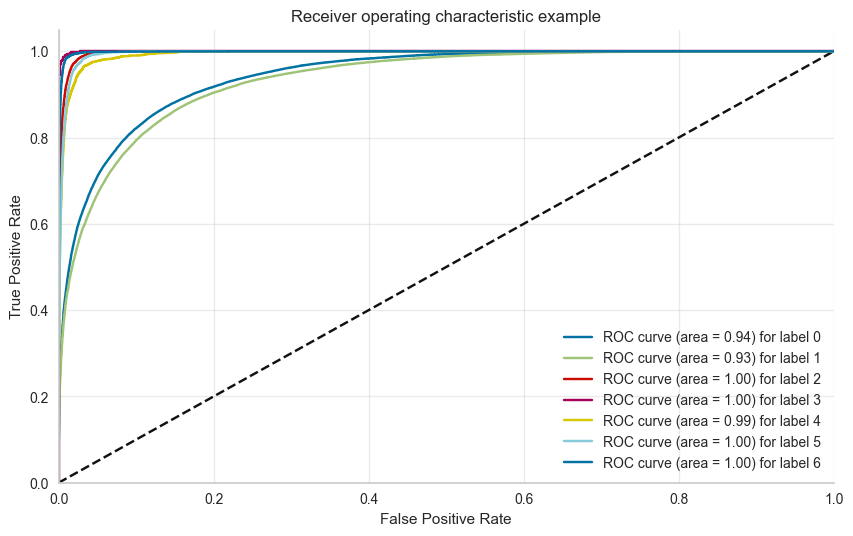

In [153]:
plot_multiclass_roc(xgb_model, X_test_scaled, y_test, n_classes=7, figsize=(10, 6))

In [154]:
xgb_s_acc = accuracy_score(y_test, y_pred)
xgb_s_f1 = f1_score(y_test, y_pred, average = "weighted")
xgb_s_f1_4 = f1_score(y_test, y_pred, labels = [4], average = None)
xgb_s_f1_5 = f1_score(y_test, y_pred, labels = [5], average = None)
xgb_s_f1_6 = f1_score(y_test, y_pred, labels = [6], average = None)
xgb_s_auc = roc_auc_score(y_test, y_pred_proba, average = "weighted", multi_class = "ovo")

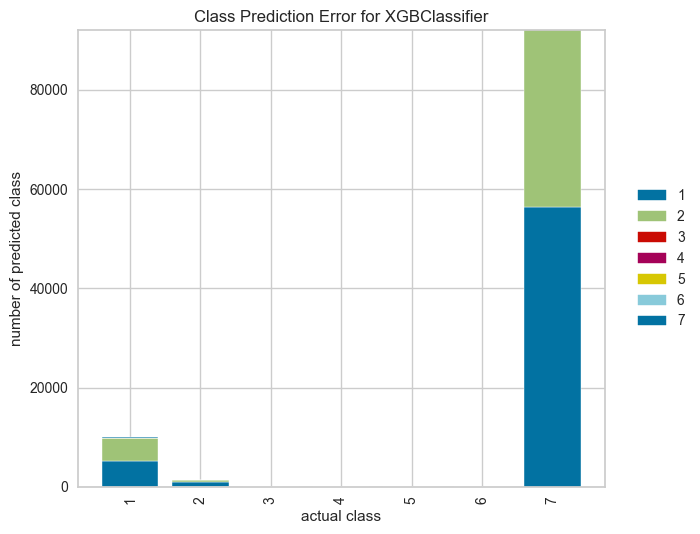

<AxesSubplot:title={'center':'Class Prediction Error for XGBClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [155]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(xgb_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

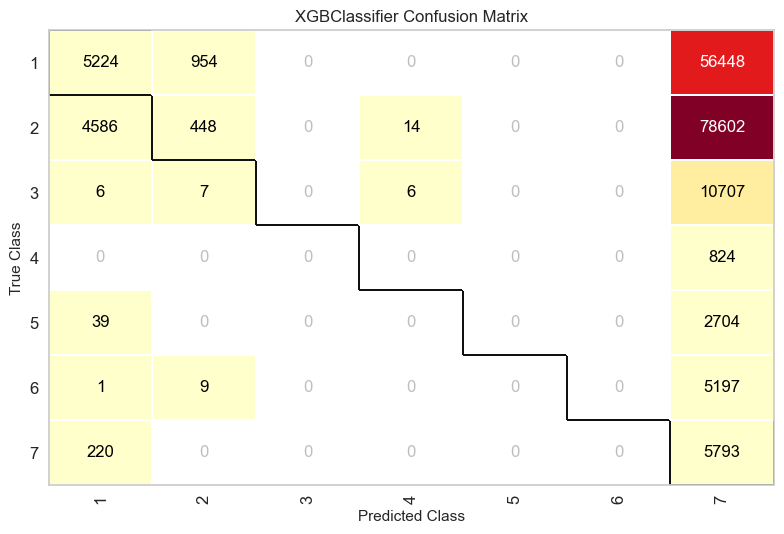

<AxesSubplot:title={'center':'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [156]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(xgb_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

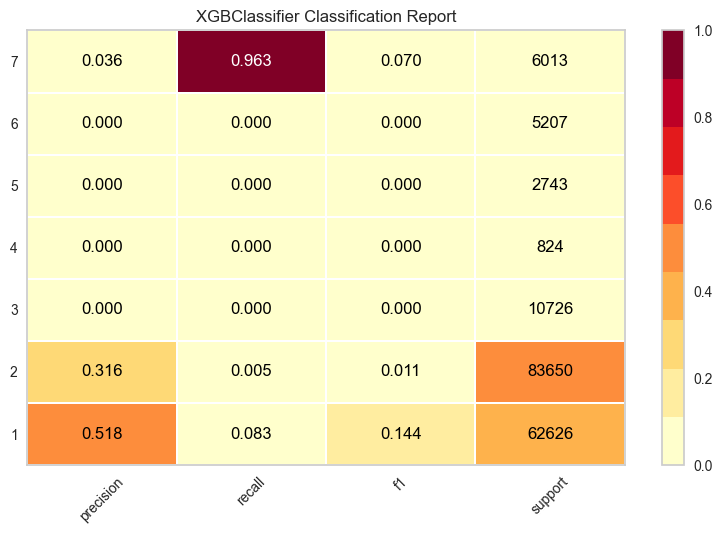

<AxesSubplot:title={'center':'XGBClassifier Classification Report'}>

In [157]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(xgb_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

### LightGBM

In [159]:
from lightgbm import LGBMClassifier

In [160]:
lgb_model = LGBMClassifier(random_state=38)
lgb_model.fit(X_resampled, y_resampled)
y_pred_proba=lgb_model.predict_proba(X_test)
y_pred=lgb_model.predict(X_test)
y_train_pred=lgb_model.predict(X_resampled)
model_performance(y_resampled, y_train_pred, y_test, y_pred)

[[51880  8841    21     0   467    57  1360]
 [12387 65701  1366     3  2820  1196   177]
 [    0    37  9928    95    34   632     0]
 [    0     0    42   768     0    14     0]
 [    5   109    53     0  2561    15     0]
 [    1    33   560    36    13  4564     0]
 [  155     2     0     0     0     0  5856]]
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.81      0.83      0.82     62626
           2       0.88      0.79      0.83     83650
           3       0.83      0.93      0.87     10726
           4       0.85      0.93      0.89       824
           5       0.43      0.93      0.59      2743
           6       0.70      0.88      0.78      5207
           7       0.79      0.97      0.87      6013

    accuracy                           0.82    171789
   macro avg       0.76      0.89      0.81    171789
weighted avg       0.83      0.82      0.82    171789

-------------------------------

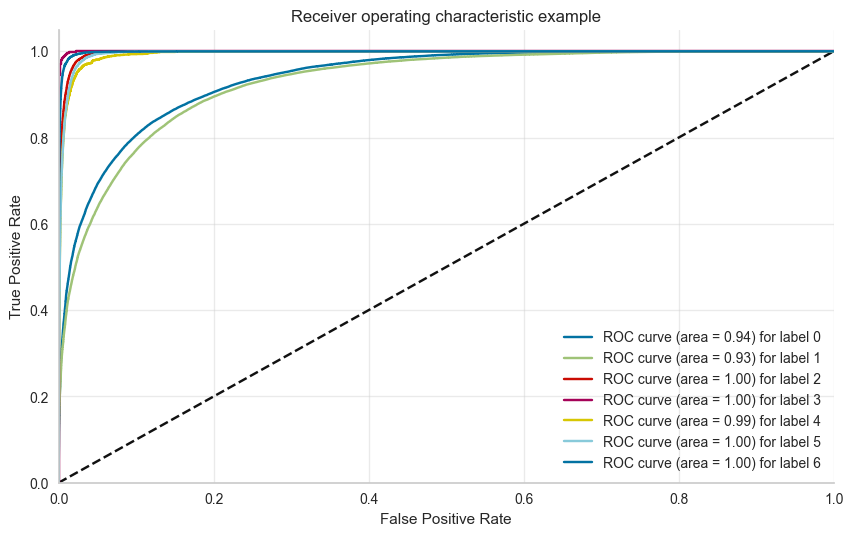

In [161]:
plot_multiclass_roc(lgb_model, X_test, y_test, n_classes=7, figsize=(10, 6))

In [162]:
lgb_s_acc = accuracy_score(y_test, y_pred)
lgb_s_f1 = f1_score(y_test, y_pred, average = "weighted")
lgb_s_f1_4 = f1_score(y_test, y_pred, labels = [4], average = None)
lgb_s_f1_5 = f1_score(y_test, y_pred, labels = [5], average = None)
lgb_s_f1_6 = f1_score(y_test, y_pred, labels = [6], average = None)
lgb_s_auc = roc_auc_score(y_test, y_pred_proba, average = "weighted", multi_class = "ovo")

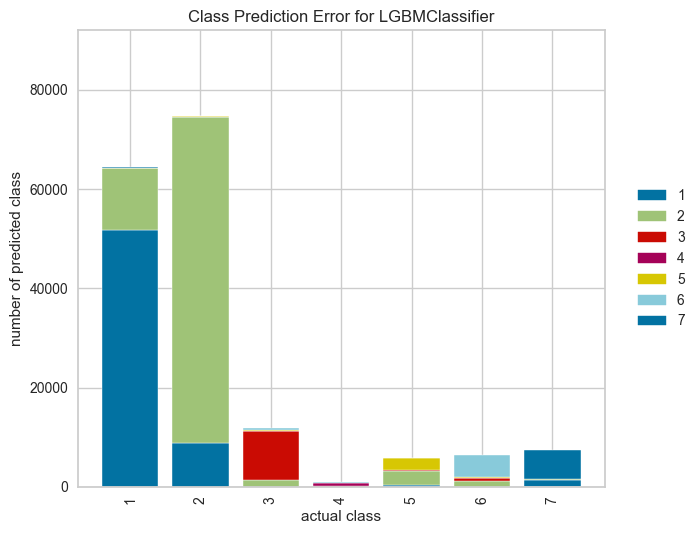

<AxesSubplot:title={'center':'Class Prediction Error for LGBMClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [163]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(lgb_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

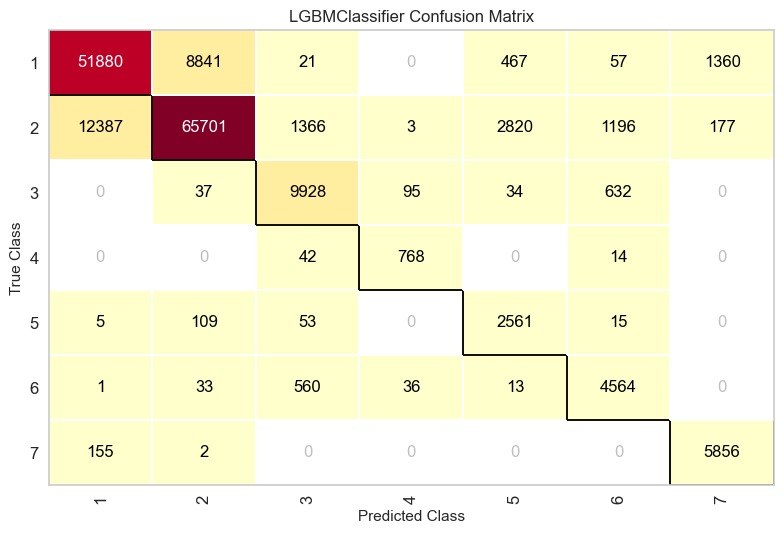

<AxesSubplot:title={'center':'LGBMClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [164]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(lgb_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

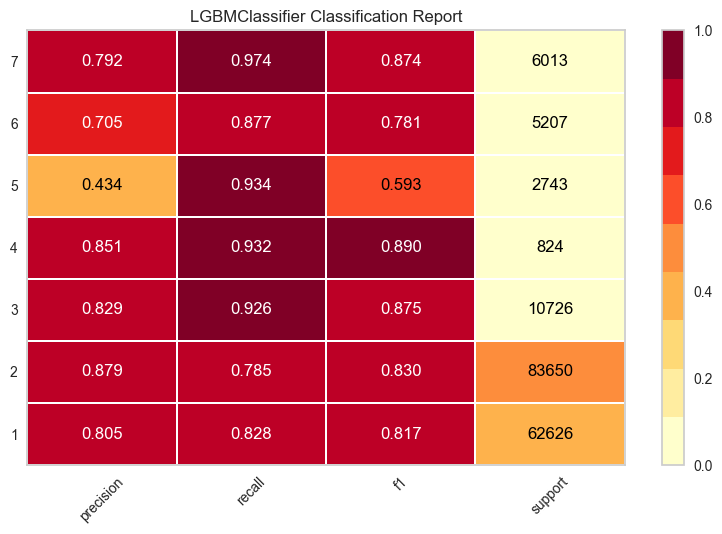

<AxesSubplot:title={'center':'LGBMClassifier Classification Report'}>

In [165]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(lgb_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

### Comparing

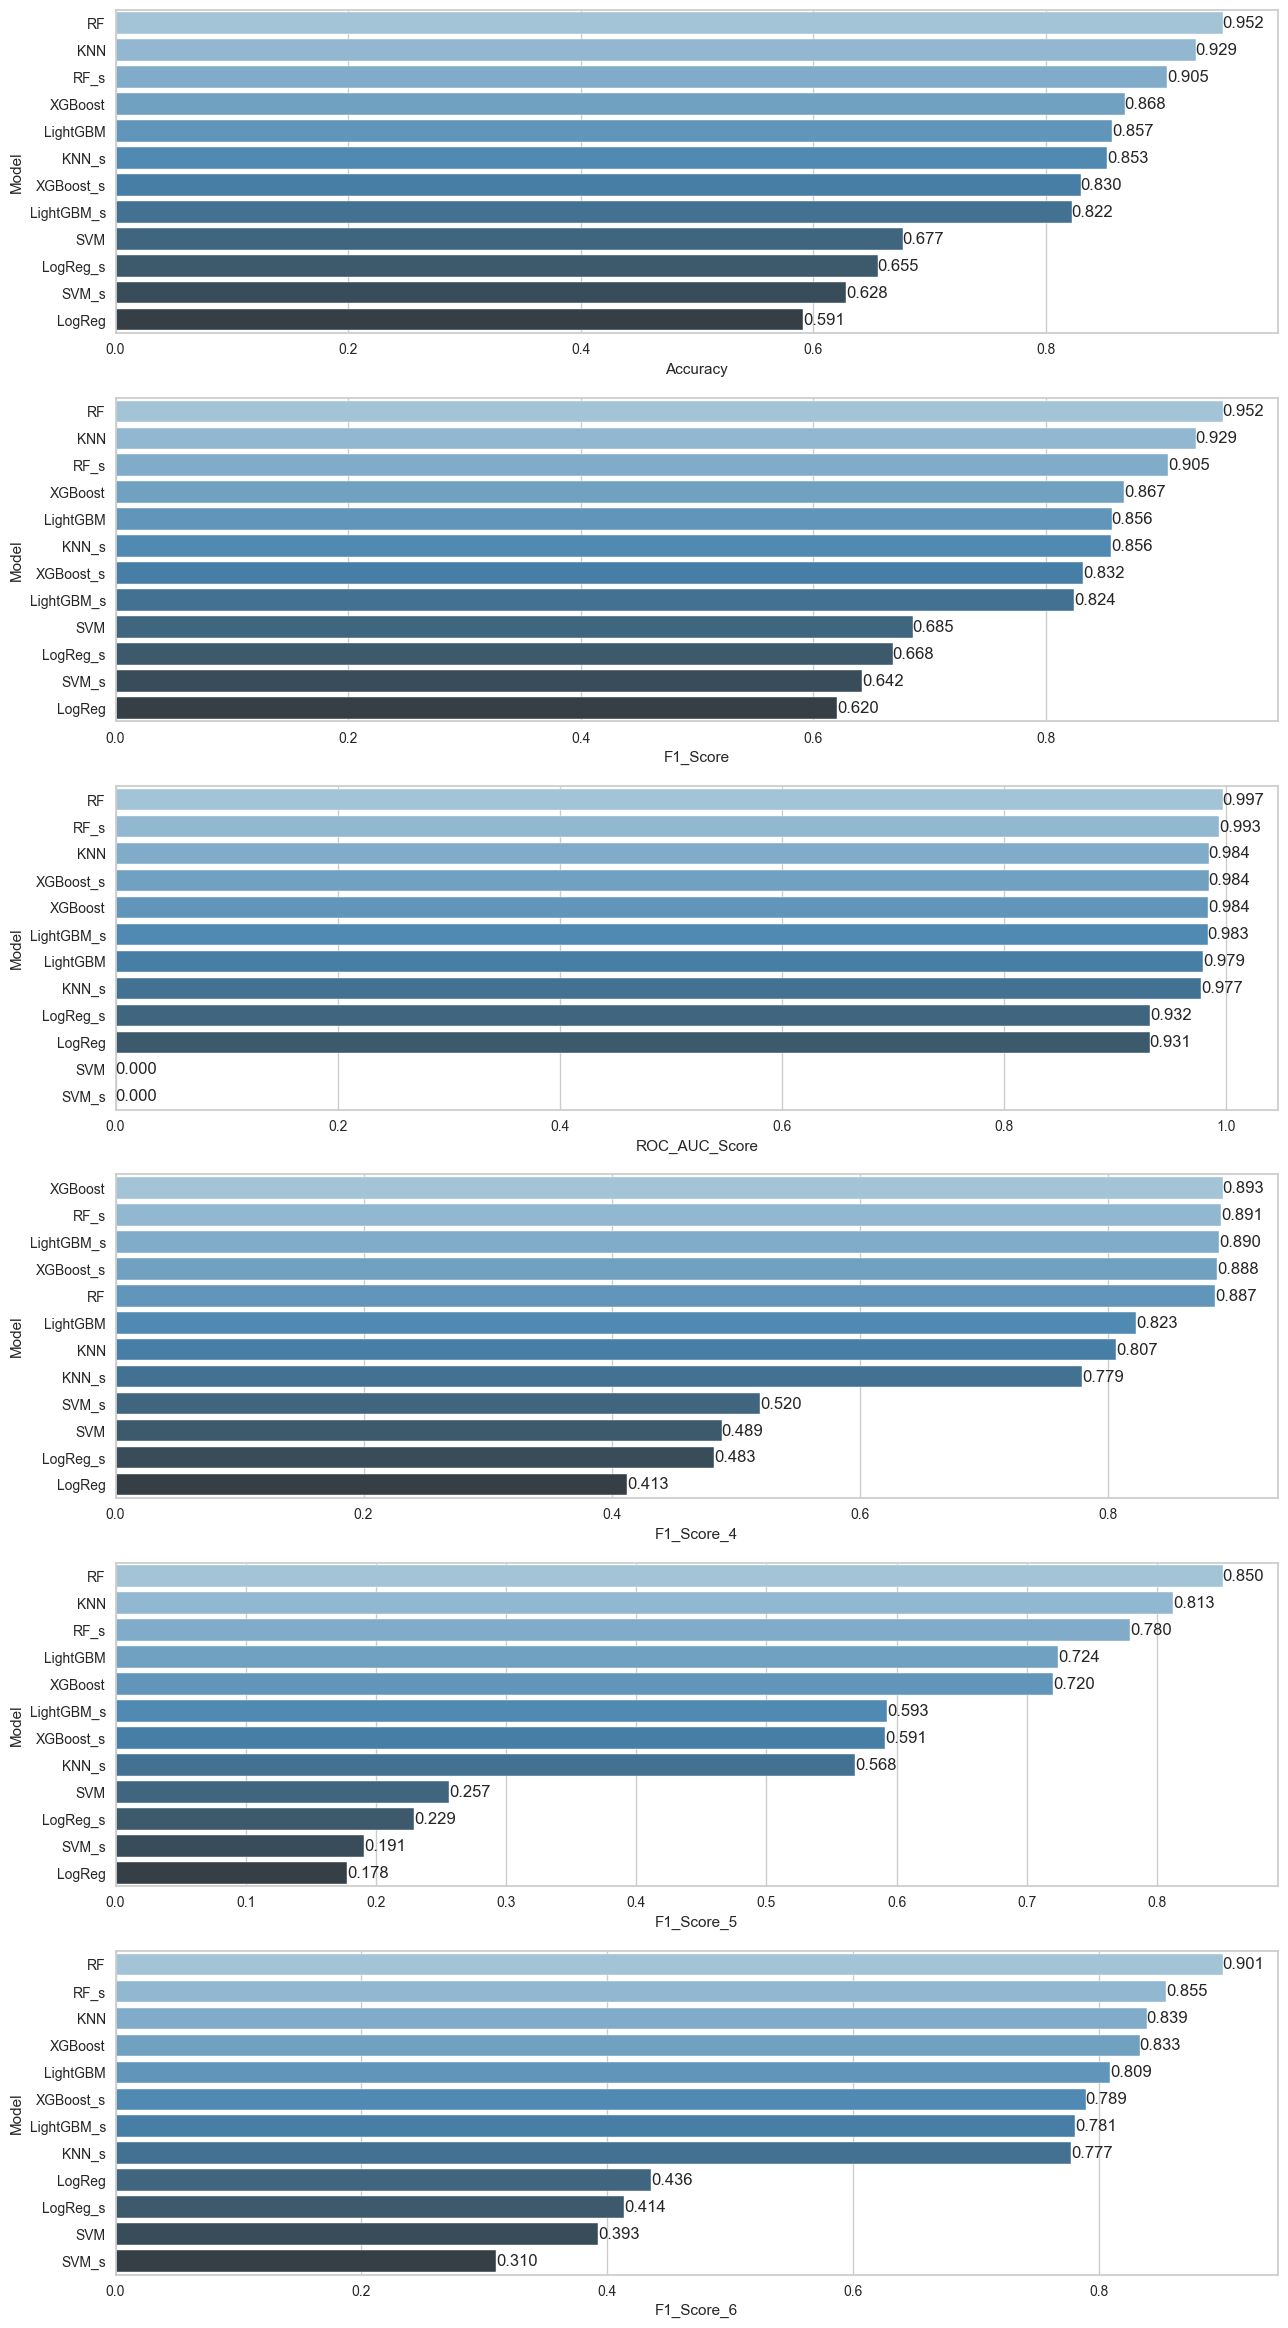

In [167]:
compare = pd.DataFrame({"Model": ["LogReg", "KNN", "SVM", "RF", "XGBoost", "LightGBM", "LogReg_s", "KNN_s", "SVM_s", "RF_s", "XGBoost_s", "LightGBM_s"],
                        "Accuracy": [log_acc, knn_acc, svm_acc, rf_acc, xgb_acc, lgb_acc, log_s_acc, knn_s_acc, svm_s_acc, rf_s_acc, xgb_s_acc, lgb_s_acc],
                        "F1_Score": [log_f1, knn_f1, svm_f1, rf_f1, xgb_f1, lgb_f1, log_s_f1, knn_s_f1, svm_s_f1, rf_s_f1, xgb_s_f1, lgb_s_f1],
                        "F1_Score_4": [log_f1_4[0], knn_f1_4[0], svm_f1_4[0], rf_f1_4[0], xgb_f1_4[0], lgb_f1_4[0], log_s_f1_4[0], knn_s_f1_4[0], svm_s_f1_4[0], rf_s_f1_4[0], xgb_s_f1_4[0], lgb_s_f1_4[0]],
                        "F1_Score_5": [log_f1_5[0], knn_f1_5[0], svm_f1_5[0], rf_f1_5[0], xgb_f1_5[0], lgb_f1_5[0], log_s_f1_5[0], knn_s_f1_5[0], svm_s_f1_5[0], rf_s_f1_5[0], xgb_s_f1_5[0], lgb_s_f1_5[0]],
                        "F1_Score_6": [log_f1_6[0], knn_f1_6[0], svm_f1_6[0], rf_f1_6[0], xgb_f1_6[0], lgb_f1_6[0], log_s_f1_6[0], knn_s_f1_6[0], svm_s_f1_6[0], rf_s_f1_6[0], xgb_s_f1_6[0], lgb_s_f1_6[0]],
                        "ROC_AUC_Score": [log_auc, knn_auc, 0, rf_auc, xgb_auc, lgb_auc, log_s_auc, knn_s_auc, 0, rf_s_auc, xgb_s_auc, lgb_s_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                       
        ax.text(width,                              
                p.get_y() + p.get_height() / 2,     
                '{:1.3f}'.format(width),             
                ha = 'left',                         
                va = 'center')                     
    
plt.figure(figsize=(15,30))
plt.subplot(611)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(612)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(613)
compare = compare.sort_values(by="ROC_AUC_Score", ascending=False)
ax=sns.barplot(x="ROC_AUC_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(614)
compare = compare.sort_values(by="F1_Score_4", ascending=False)
ax=sns.barplot(x="F1_Score_4", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(615)
compare = compare.sort_values(by="F1_Score_5", ascending=False)
ax=sns.barplot(x="F1_Score_5", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(616)
compare = compare.sort_values(by="F1_Score_6", ascending=False)
ax=sns.barplot(x="F1_Score_6", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

## Modeling and Prediction

In [168]:
import pickle

In [169]:
final_model = RandomForestClassifier(random_state=101).fit(X, y)

In [170]:
pickle.dump(final_model, open("final_model_tree_types", 'wb'))

In [171]:
my_dict = {"Elevation": 2500,
           "Aspect": 150,
           "Slope": 30,
           "Horizontal_Distance_To_Hydrology": 100,
           "Vertical_Distance_To_Hydrology": 25,
           "Horizontal_Distance_To_Roadways": 2000,
           "Hillshade_9am": 218,
           "Hillshade_Noon": 226,
           "Hillshade_3pm": 143,
           "Horizontal_Distance_To_Fire_Points": 3000,
           "Wilderness": "Area1",
           "Soil": "Type5"
          }

In [172]:
my_dict = pd.DataFrame([my_dict])
my_dict

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2500     150     30                               100   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              25                             2000   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            218             226            143   

   Horizontal_Distance_To_Fire_Points Wilderness   Soil  
0                                3000      Area1  Type5

In [173]:
my_dict = pd.get_dummies(my_dict).reindex(columns=X.columns, fill_value=0)
my_dict

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2500     150     30                               100   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              25                             2000   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            218             226            143   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                3000                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           1           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            0   

   Soil_Type30  Soil_Type31  Soil_Type32  Soil_Type33  Soil_Type34  \
0            0            0            0            0            0   

   Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  \
0            0            0            0            0            0   

   Soil_Type40  
0            0

In [174]:
final_model.predict(my_dict)

array([2], dtype=int64)